# Data Storytelling

The main purpose of this step is to find trend of changes in data attribute in relation to player position and time. Therefore I will divide the cleansed data according to position and according to time. The row data attributes I will look at are:

    PTS - Number of points
    3PA - number of 3-Pointer attempt
    2PA - number of 2-Pointer attempt
    AST - number of assists
    TRB - number of total rebound
    PF - number of personal fouls
    FT - number of free throws
    BLK - number of blocks

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns

In [43]:
with open('data/Seasons_Stats_cleansed.csv') as csvfile:
    reader1 = csv.reader(csvfile)
data = pd.read_csv('data/Seasons_Stats_cleansed.csv',sep='\t')

### Divide the datasets into 5 sets, each is corroesponding to one position

In [45]:
pg = data[data['Pos'] == 'PG']
sg = data[data['Pos'] == 'SG']
sf = data[data['Pos'] == 'SF']
pf = data[data['Pos'] == 'PF']
c = data[data['Pos'] == 'C']

### Divide the datasets into 4 sets, each is corroesponding to one time period
    pre 90s - from 1978 to 1990
    _90s - from 1991 to 2000
    _00s - from 2001 to 2010
    _10s - from 2011 to 2017

In [103]:
pre90s = data[~(data['Year']>1989)]
_90s = data[~(data['Year']<1990) & ~(data['Year']>1999)]
_00s = data[~(data['Year']<2000) & ~(data['Year']>2009)]
_10s = data[~(data['Year']<2010)]

In [121]:
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

### Use separate scatter plot and line plot to study the general trend of certain attribute number across the time for each position, then use box plot to observe the proportional distribution of data within each position in four decades.

For each box plot, I will arrage the box for each position in the order of
PG, SG, SF, PF, C
which usually also implies height of players in ascanding order. 

## PTS (number of points)

#### PTS (number of points) of individual player in each position from 1978-2017

Text(0.5, 1.0, 'All POSITIONS')

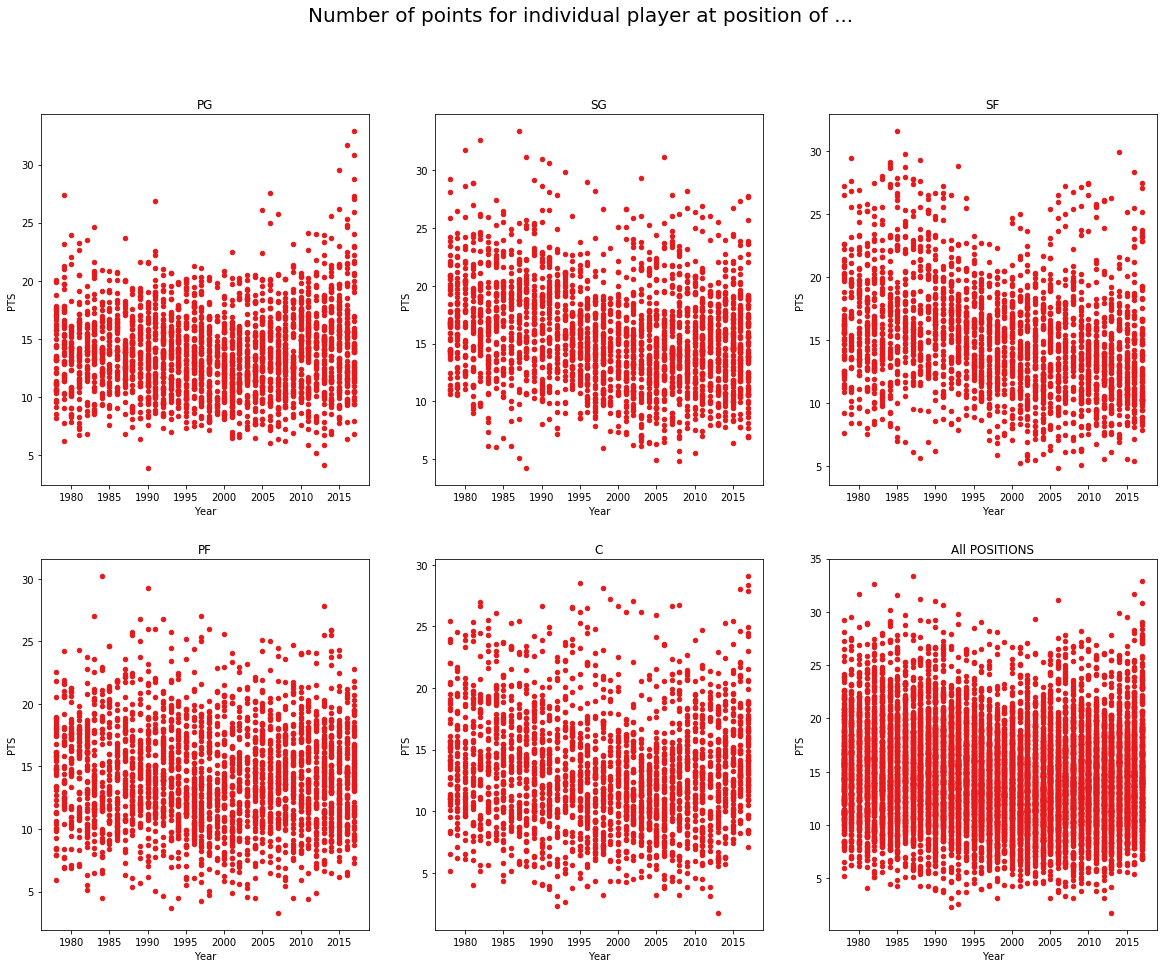

In [107]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Number of points for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="PTS",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="PTS",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="PTS",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="PTS",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="PTS",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="PTS",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

Number of points decreases in SG and SF, in other positions stays around the same.

####  Take the average number of points per game of each players in different positions

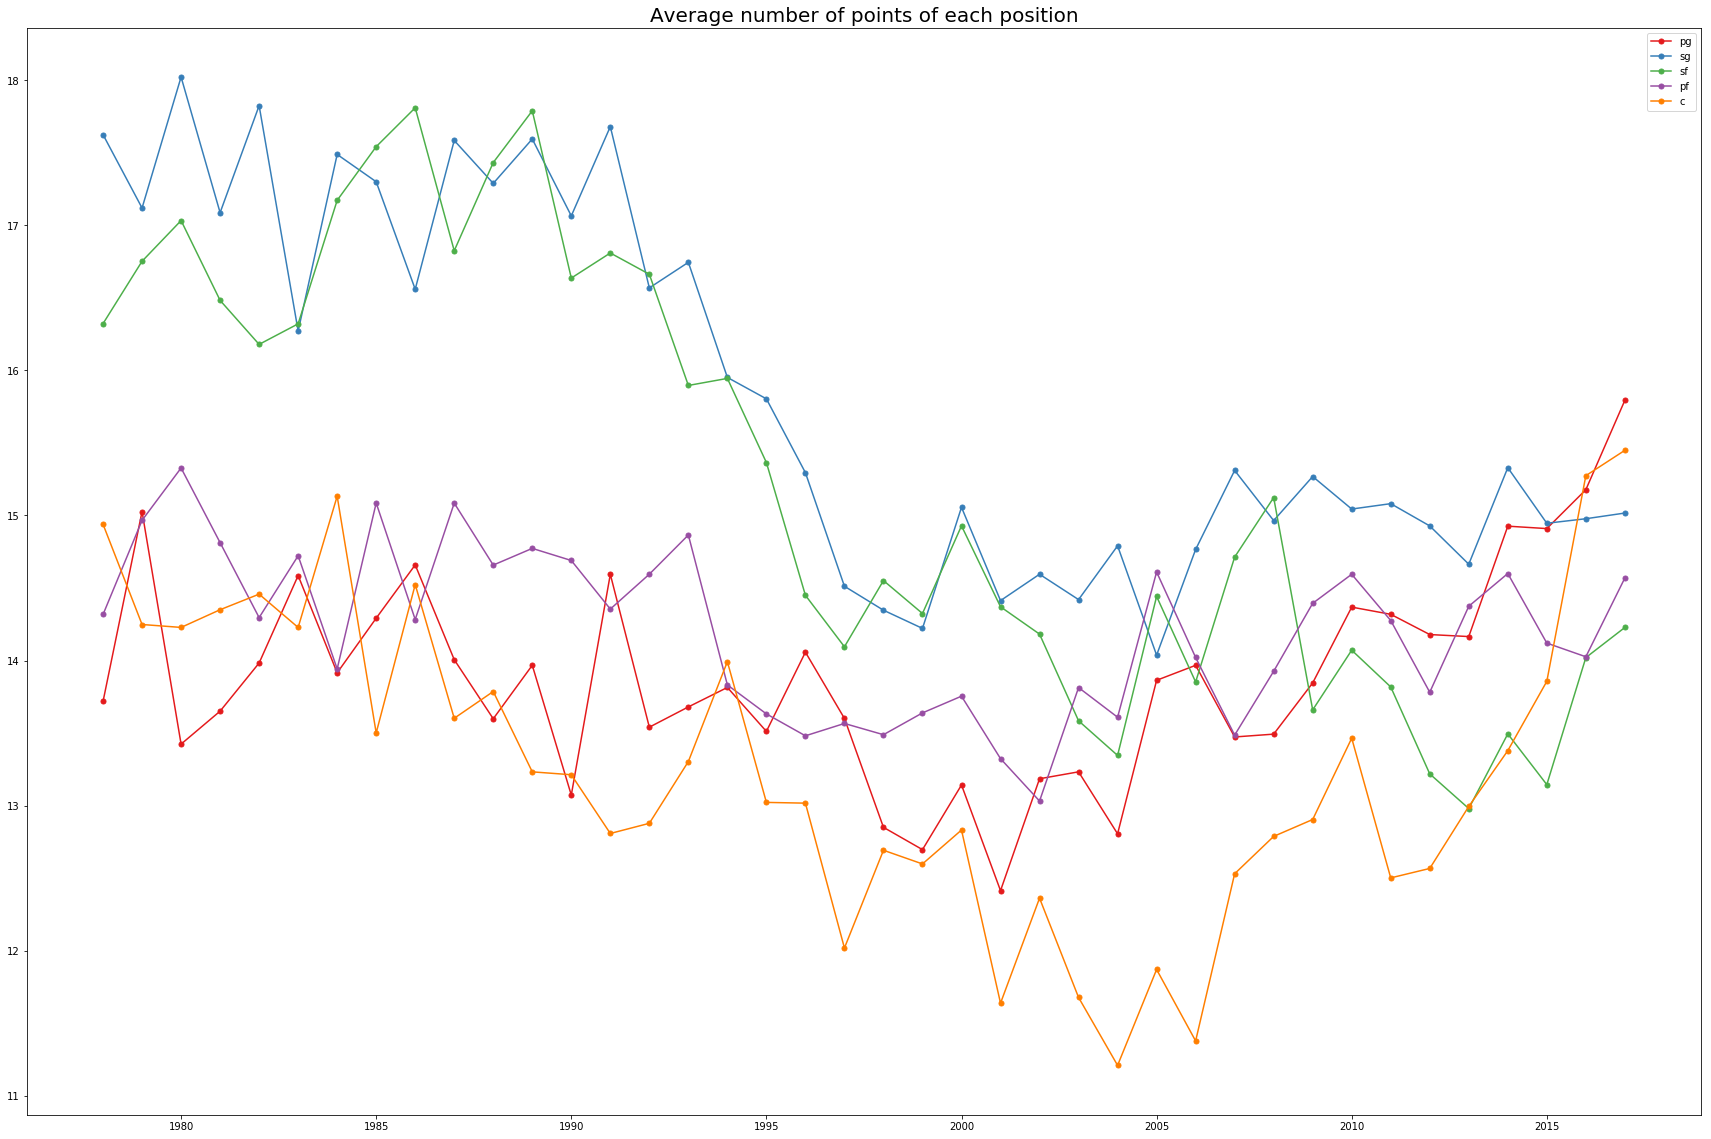

In [108]:
plt.figure(figsize=(30,20))
plt.title('Average number of points of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='pg', linestyle='-', marker='o', markersize=5)
bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='sg', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='sf', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='pf', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PTS'],label='c', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

we observe a drastic decrease in number until 1997, especially in the position of SG and SF, and the number has remain same, and significant increase happens in PG and C after 2000.

#### Observe the number of points for player distribution in each time period

Text(0.5, 1.0, '2011 to 2017')

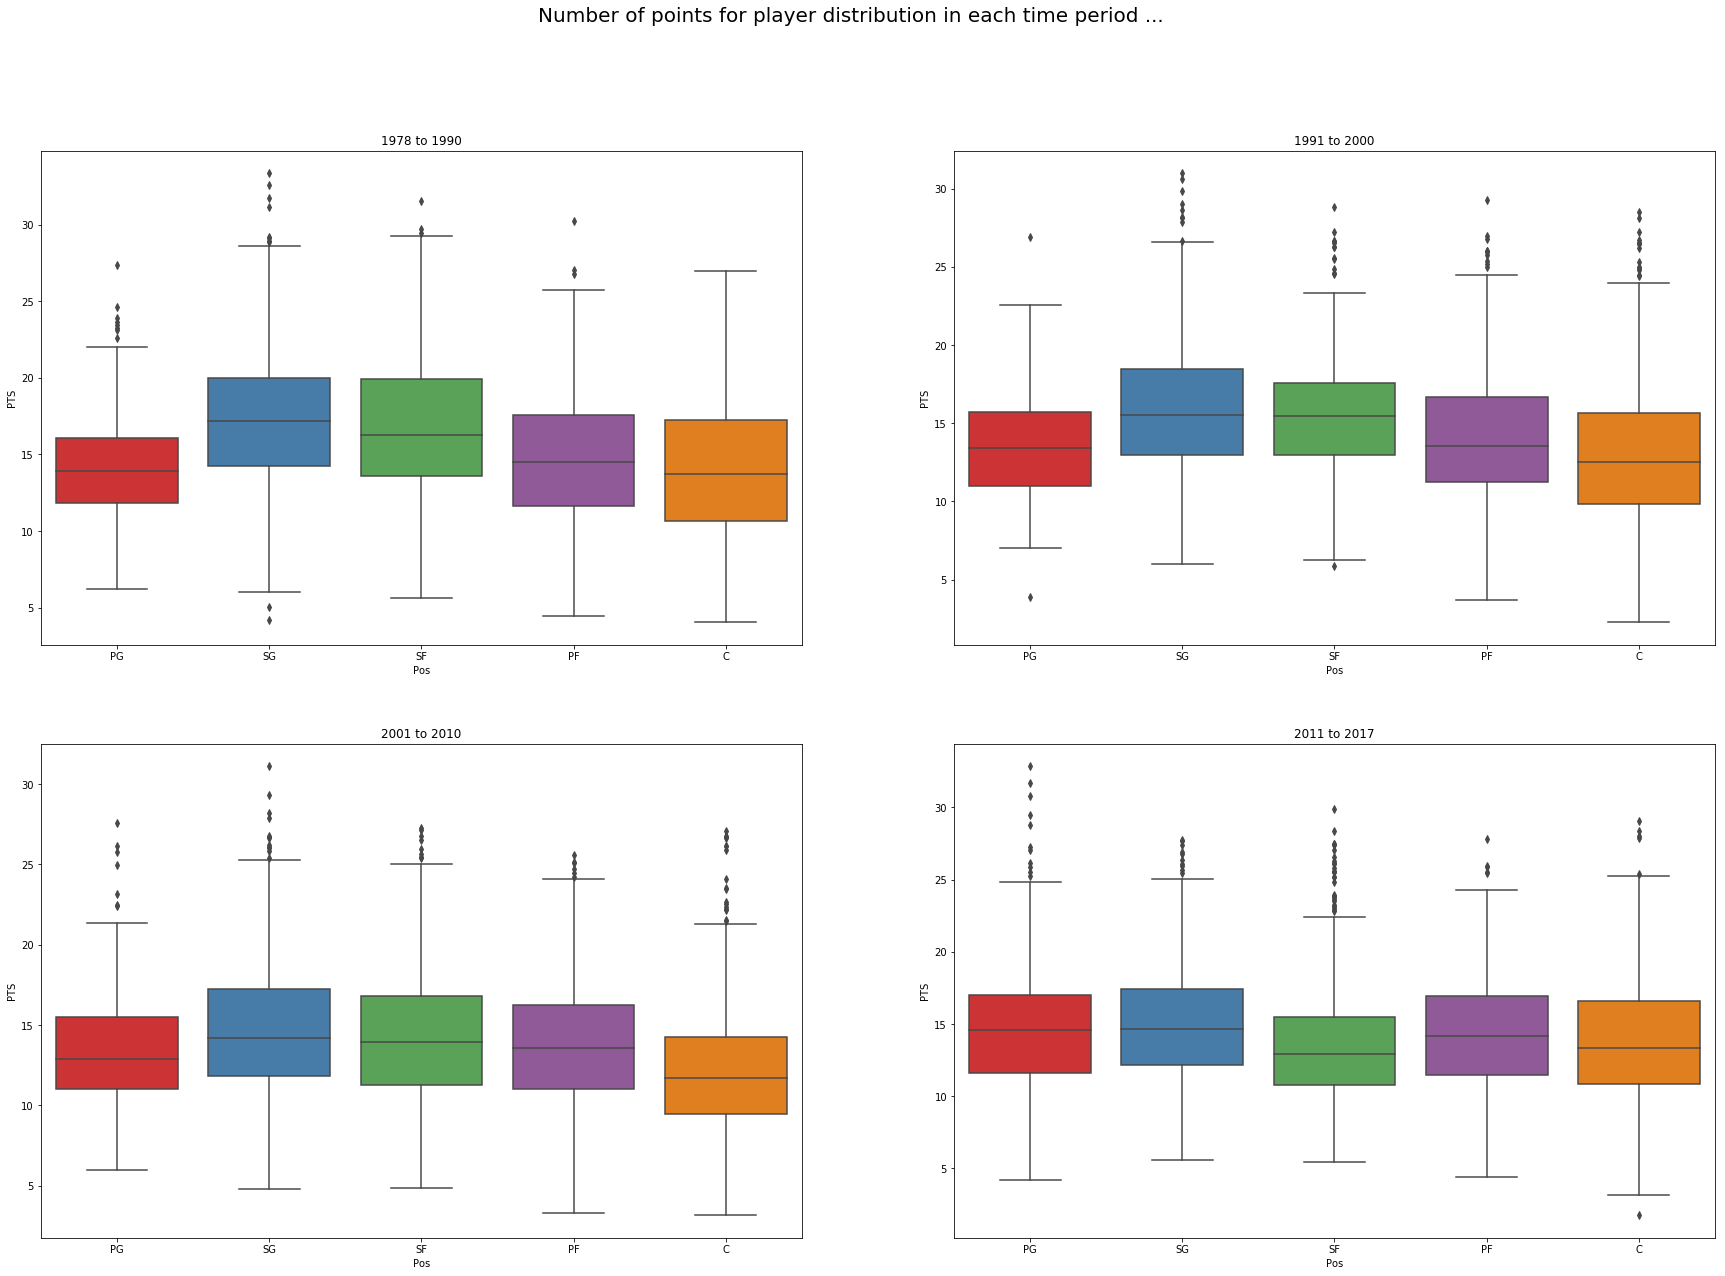

In [112]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Number of points for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="PTS", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="PTS", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="PTS", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="PTS", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

The box plot also suggests that number of points attained by each position become more even over the time.

## 3PA (number of 3-Pointer attempt)

#### 3PA (number of 3-Pointer attempt) of individual player in each position from 1978-2017

Text(0.5, 1.0, 'All POSITIONS')

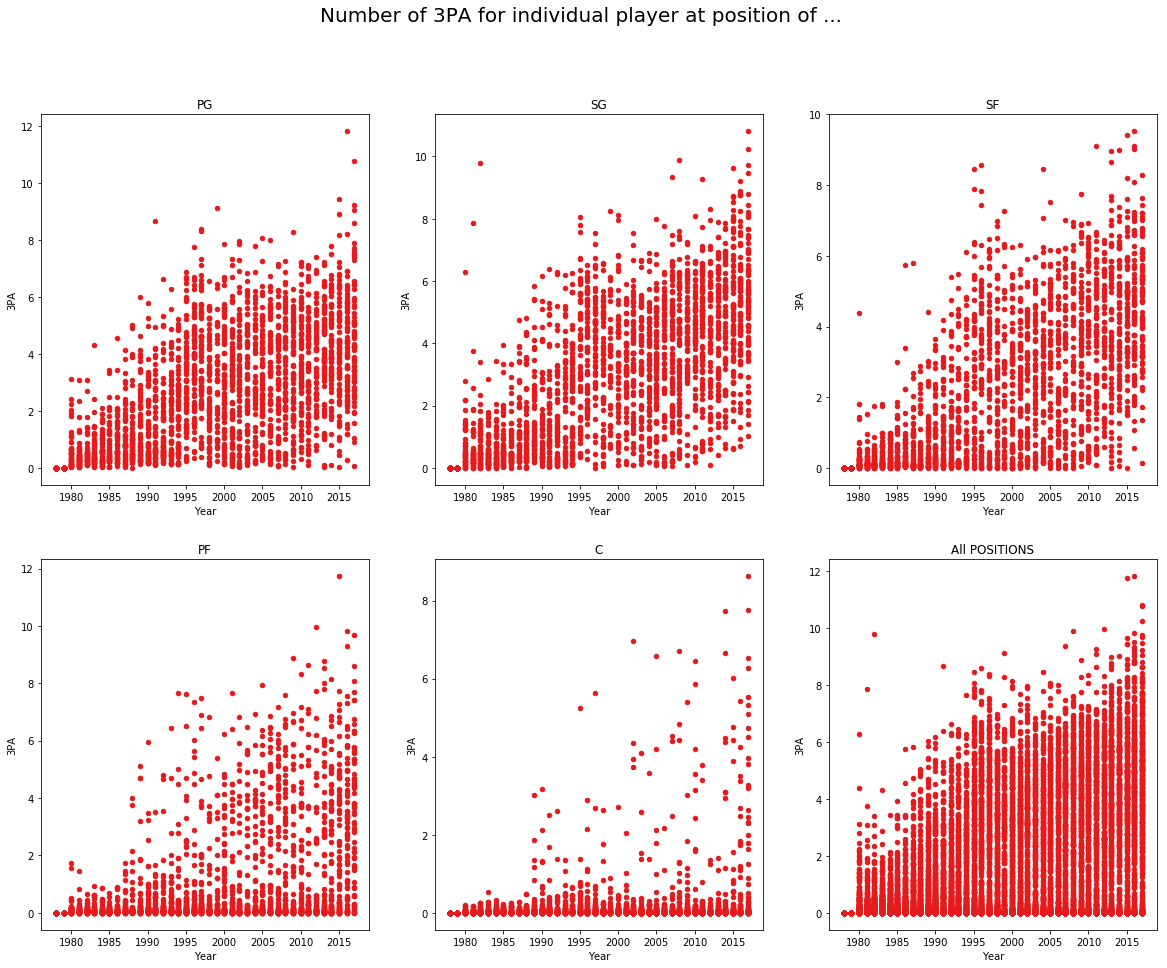

In [46]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Number of 3PA for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="3PA",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="3PA",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="3PA",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="3PA",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="3PA",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="3PA",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

PG, SG, C led the trend of increasing 3-pointer attempts.

####  Take the average number of 3-pointer attempts per game of each players in different positions

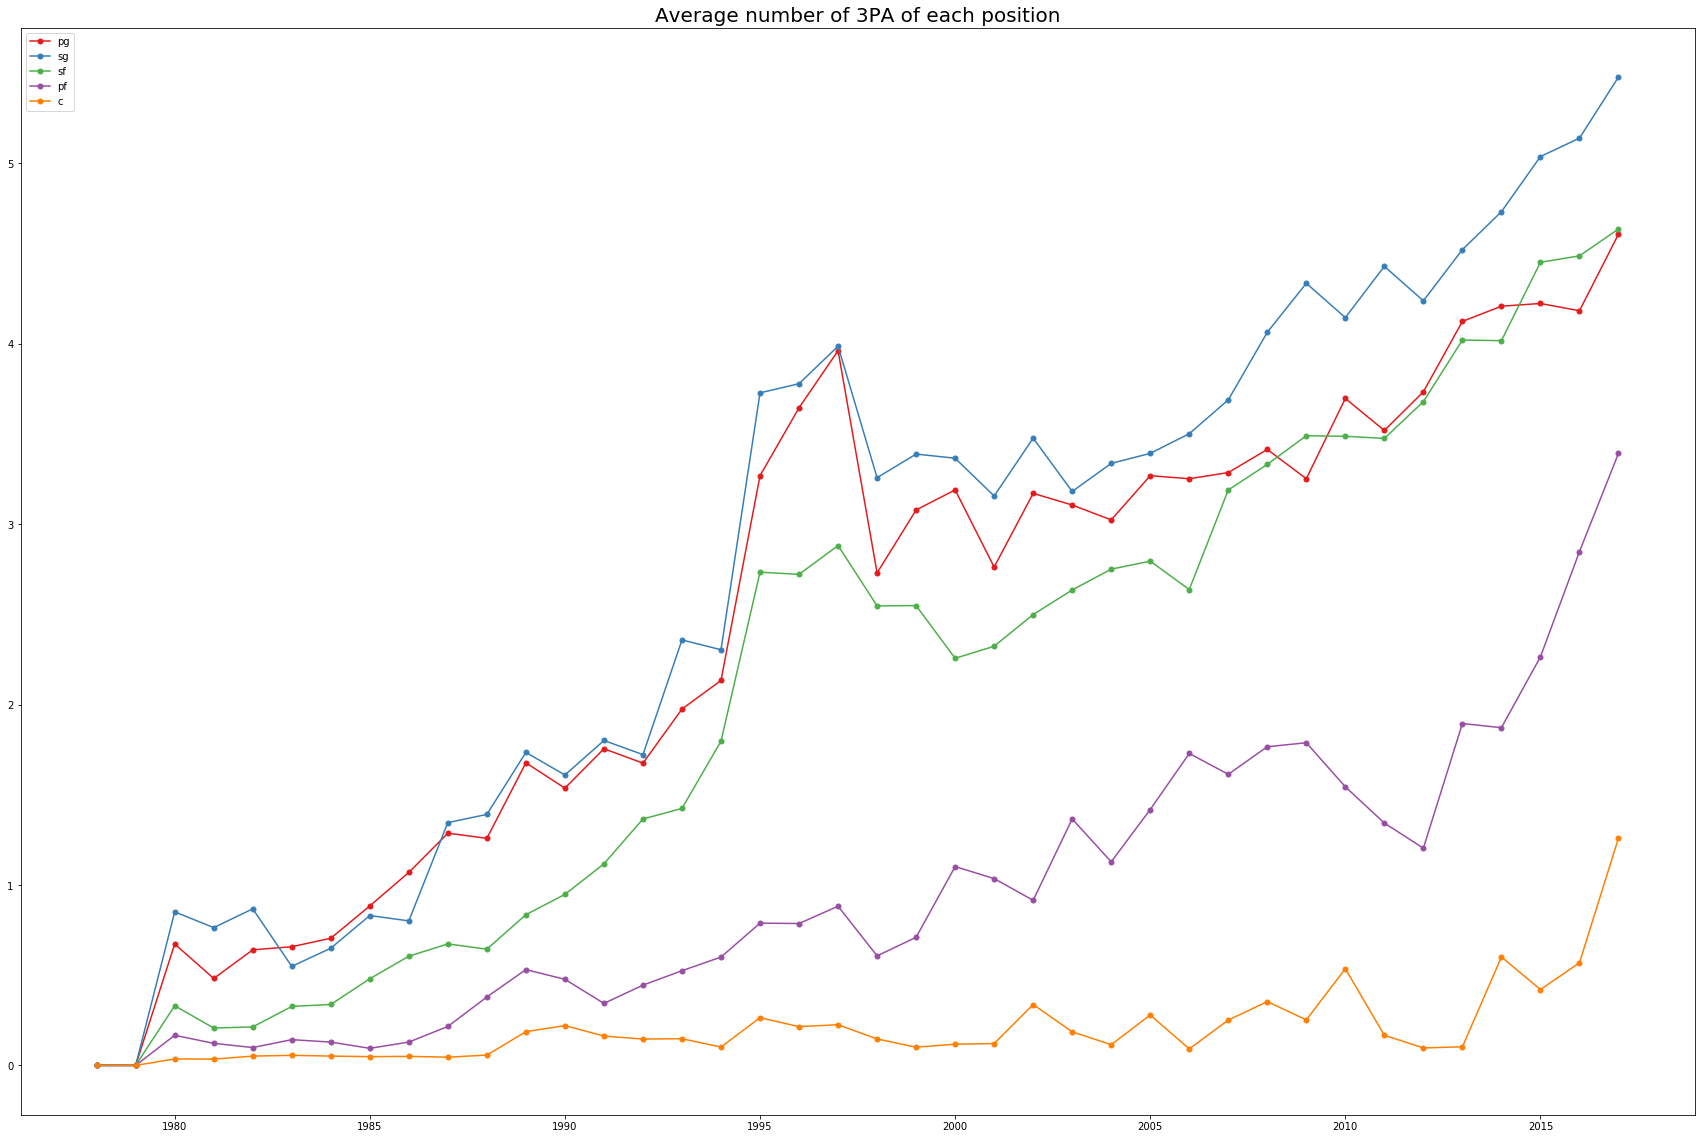

In [47]:
plt.figure(figsize=(30,20))
plt.title('Average number of 3PA of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='pg', linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='sg', linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='sf', linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='pf', linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['3PA'],label='c', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper left')
plt.show()

Number of 3-pointer attempts increases across all positions, first in PG, SG and SF, and then since 2000 in PF and 2010 in C.

#### Observe the number of 3-pointer attempts for player distribution in each time period

Text(0.5, 1.0, '2011 to 2017')

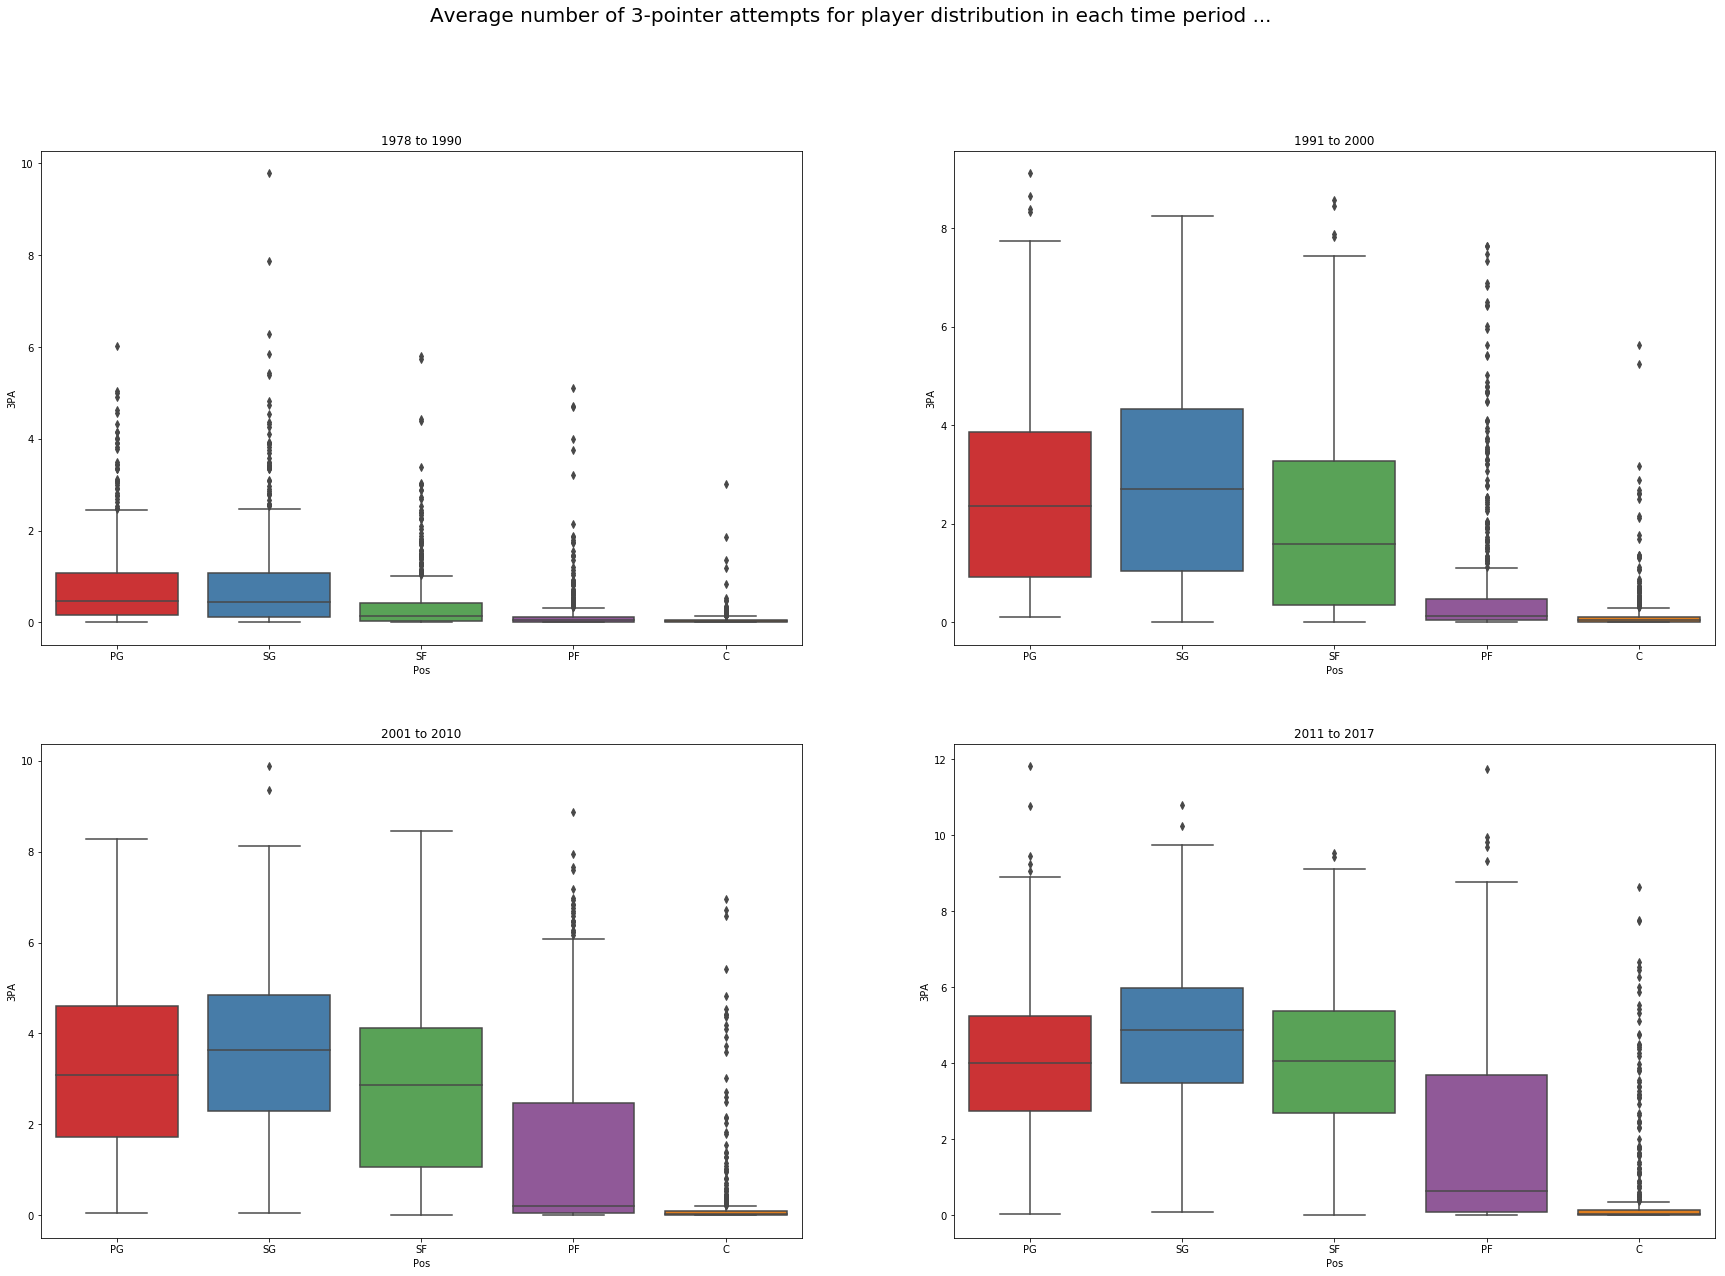

In [104]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Average number of 3-pointer attempts for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="3PA", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="3PA", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="3PA", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="3PA", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

The box plot also suggests the trend of increase in 3-pointer attempts for all positions in different periods.

## 2PA (number of 2-pointer attempt)

#### 2PA (number of 2-pointer attempt) of individual player in each position from 1978-2017

Text(0.5, 1.0, 'All POSITIONS')

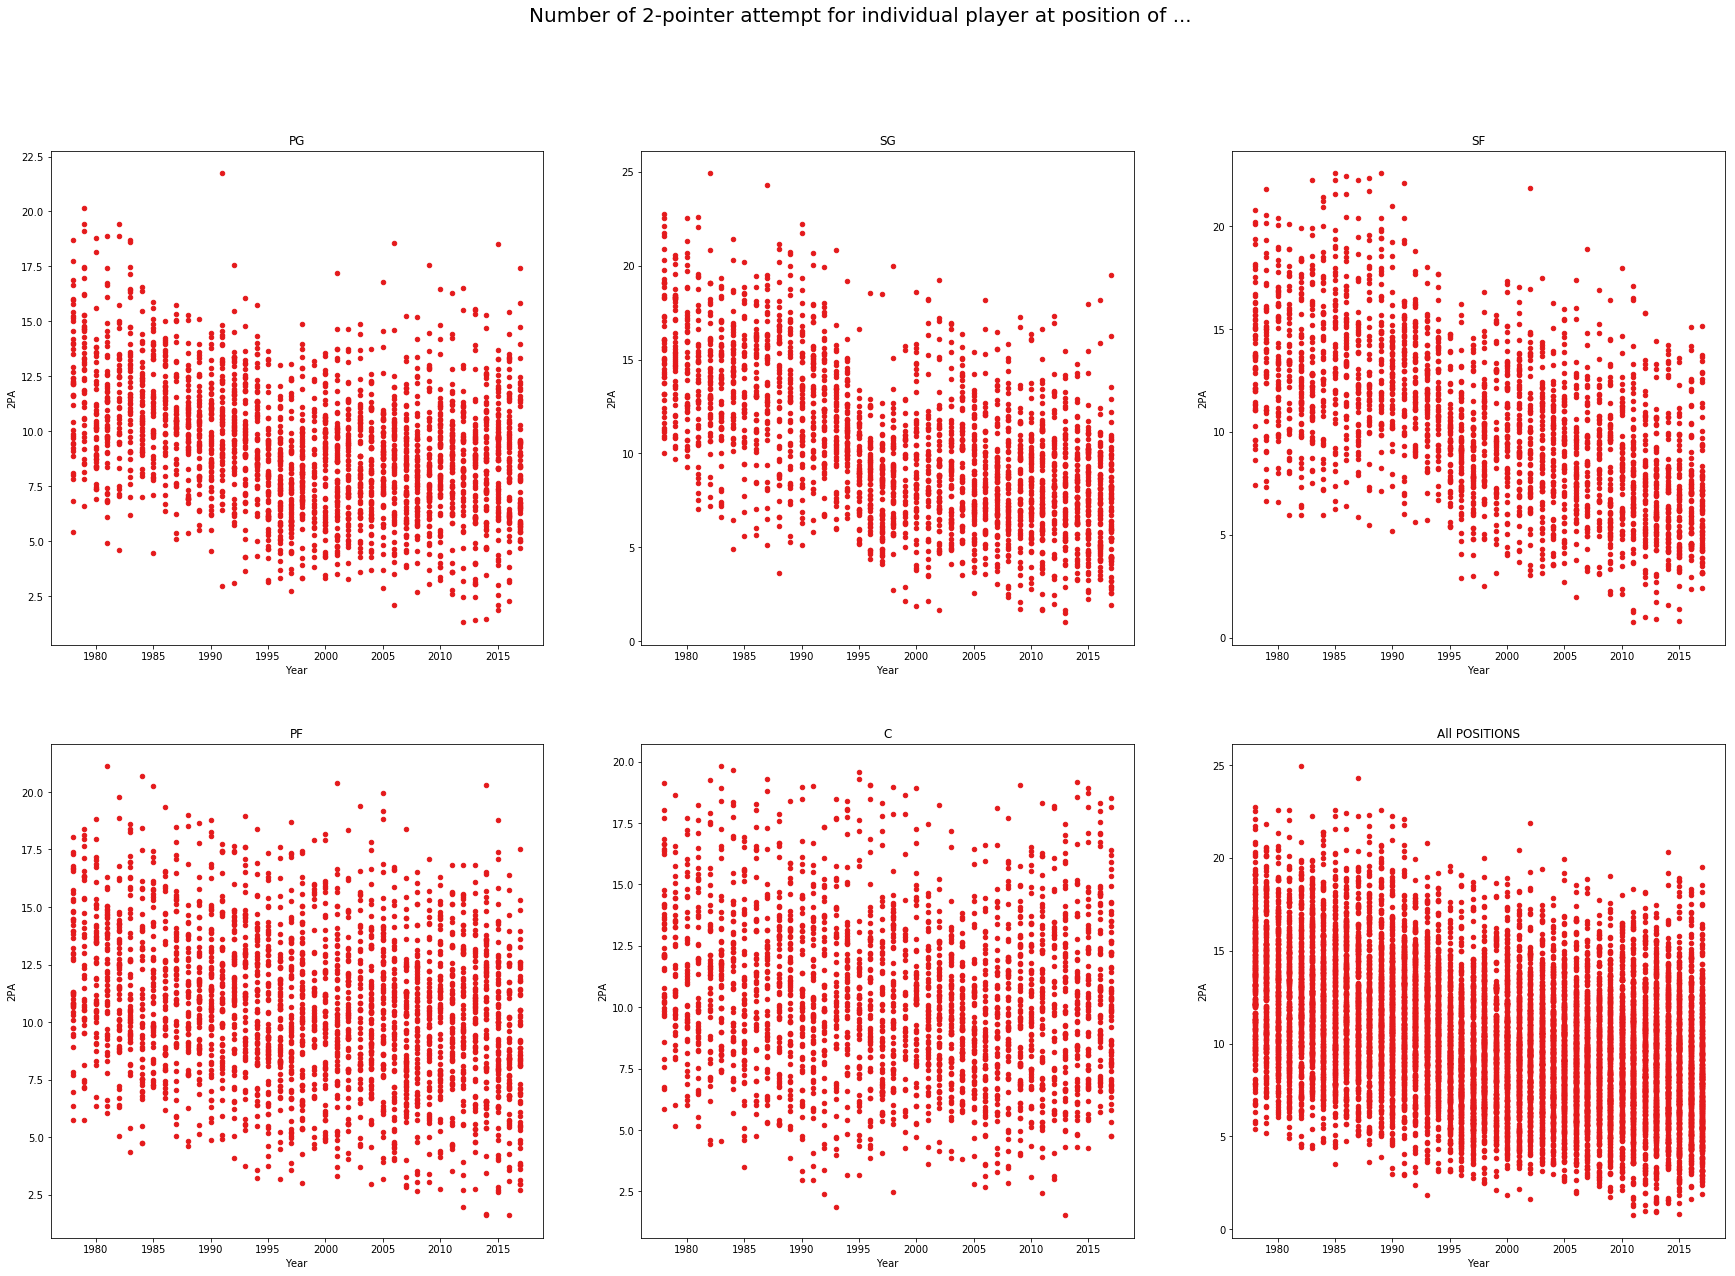

In [113]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Number of 2-pointer attempt for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="2PA",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="2PA",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="2PA",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="2PA",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="2PA",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="2PA",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

A decrease trend is very obvious, and mostly happens in PG, SG, SF.

####  Take the average number of 2-pointer attempts per game of each players in different positions

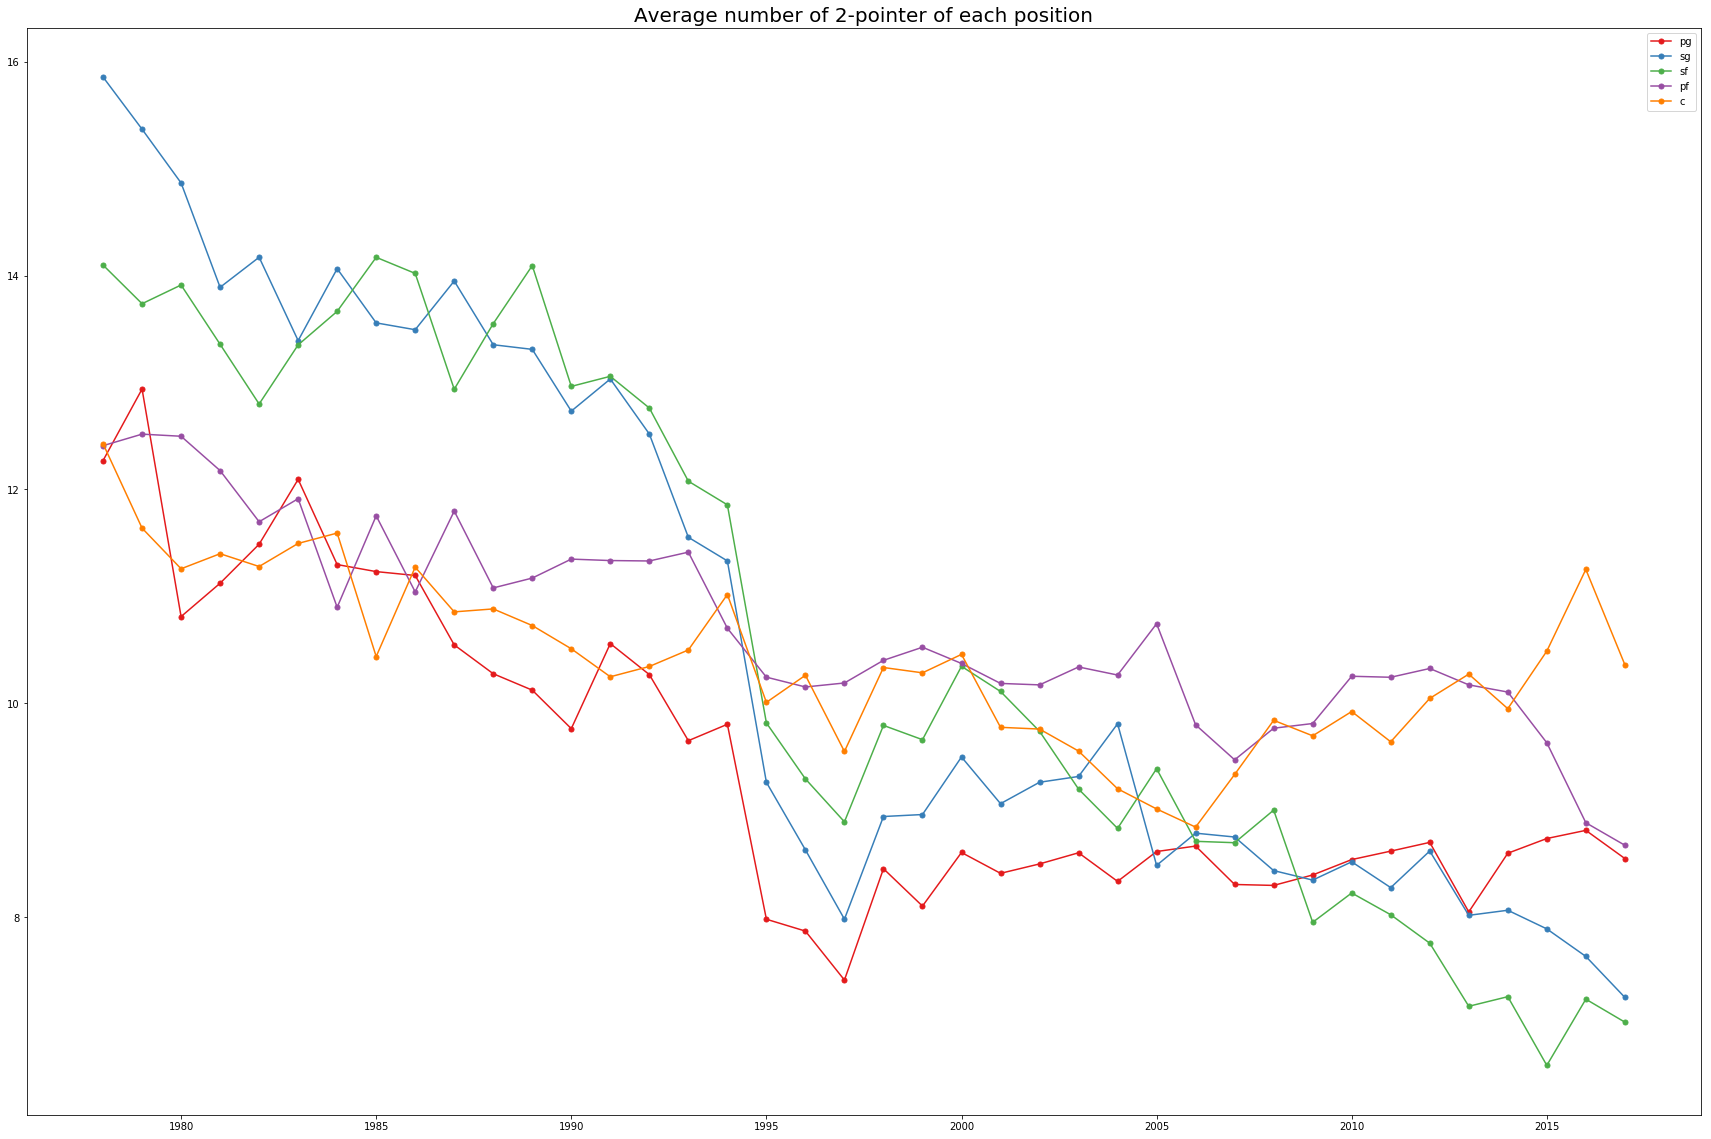

In [115]:
plt.figure(figsize=(30,20))
plt.title('Average number of 2-pointer of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='pg',linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='sg',linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='sf',linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='pf',linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['2PA'], label='c',linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

Number of 2-pointer attempts experiences significant decrease in all positions, especailly in sg and sf, until 1997, then stays at the similar level, or continue to decrese in the cases of sg and sf.

#### Observe the number of 2-pointer attempts for player distribution in each time period

Text(0.5, 1.0, '2011 to 2017')

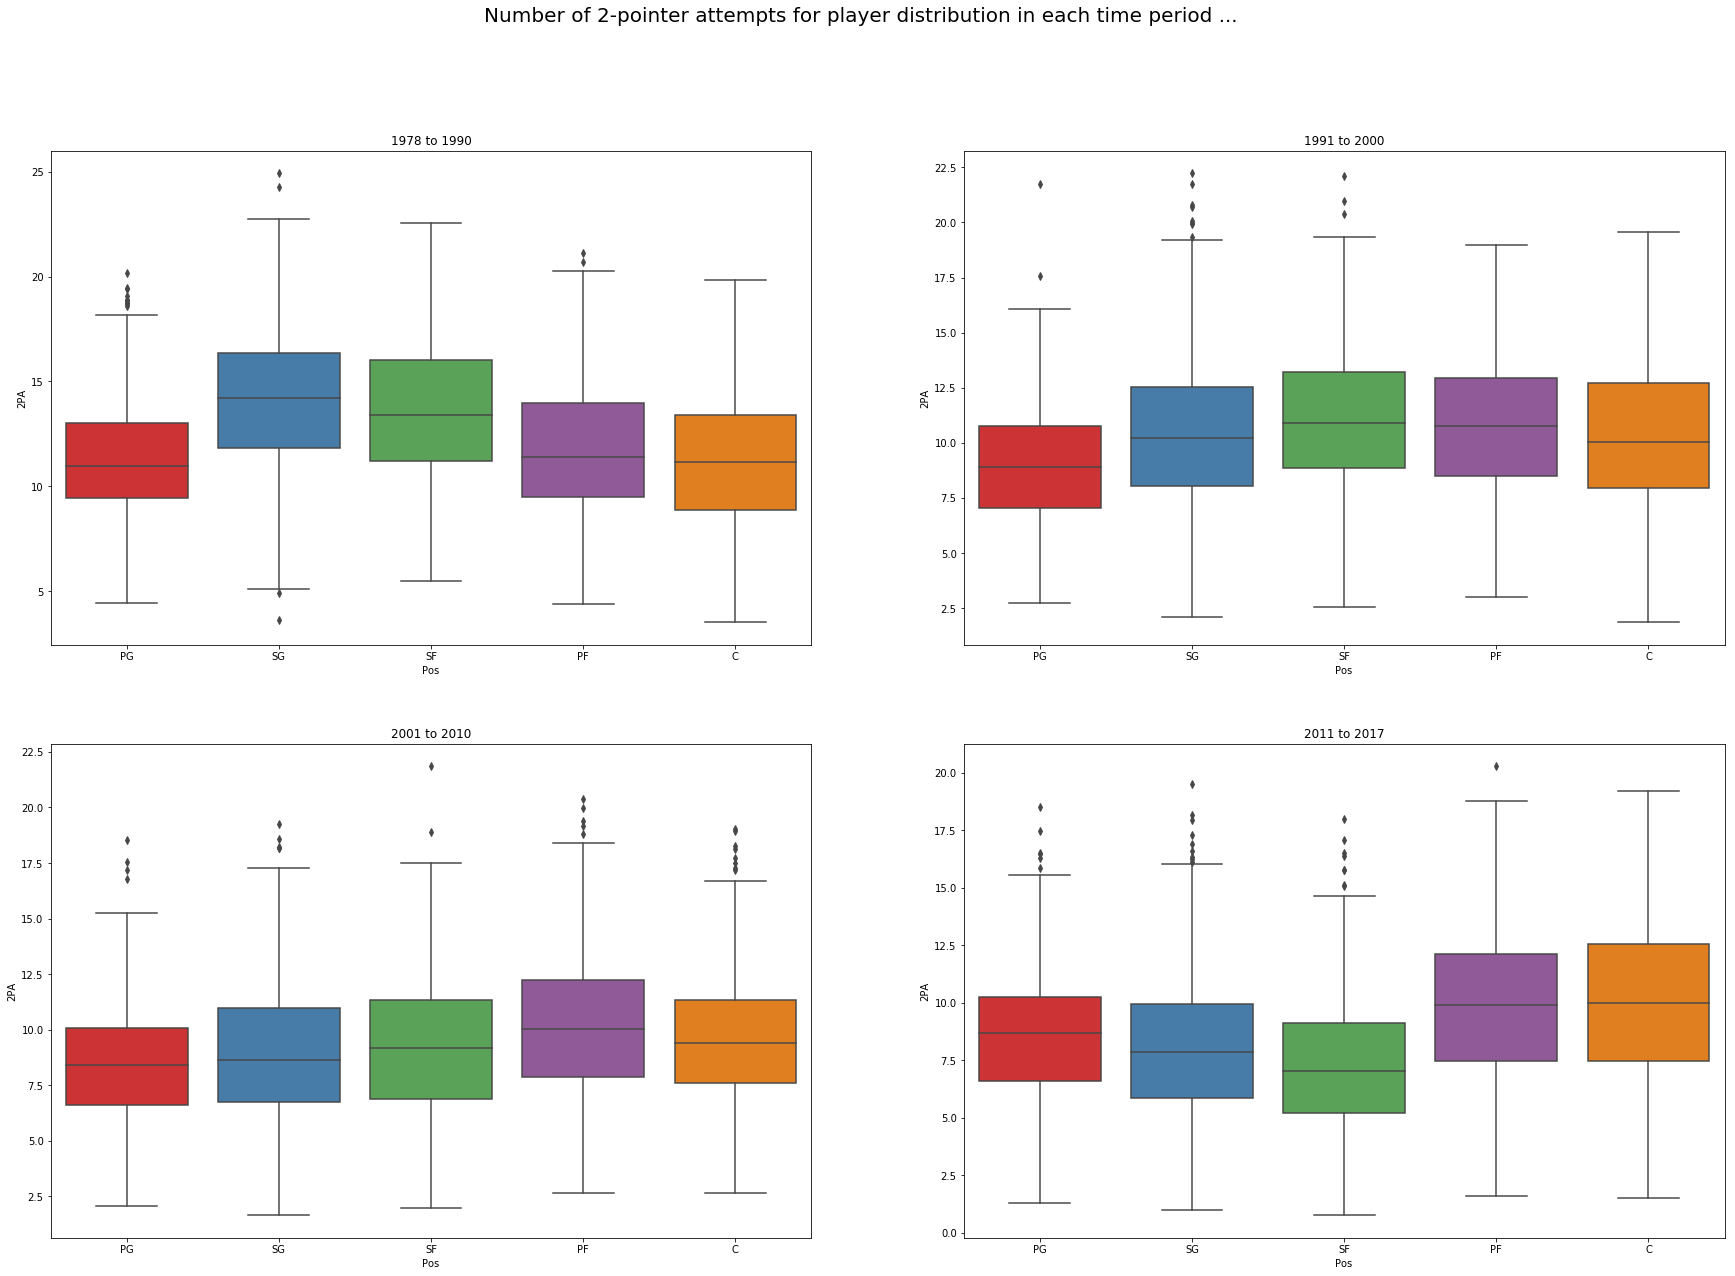

In [119]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Number of 2-pointer attempts for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="2PA", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="2PA", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="2PA", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="2PA", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

The box plot also suggests that PF and C have taken the places of SG and SF in leading the number of 2-pointer attempts over the time.

## AST (number of assists)

#### AST (number of assists) of individual player in each position from 1978-2017

Text(0.5, 1.0, 'All POSITIONS')

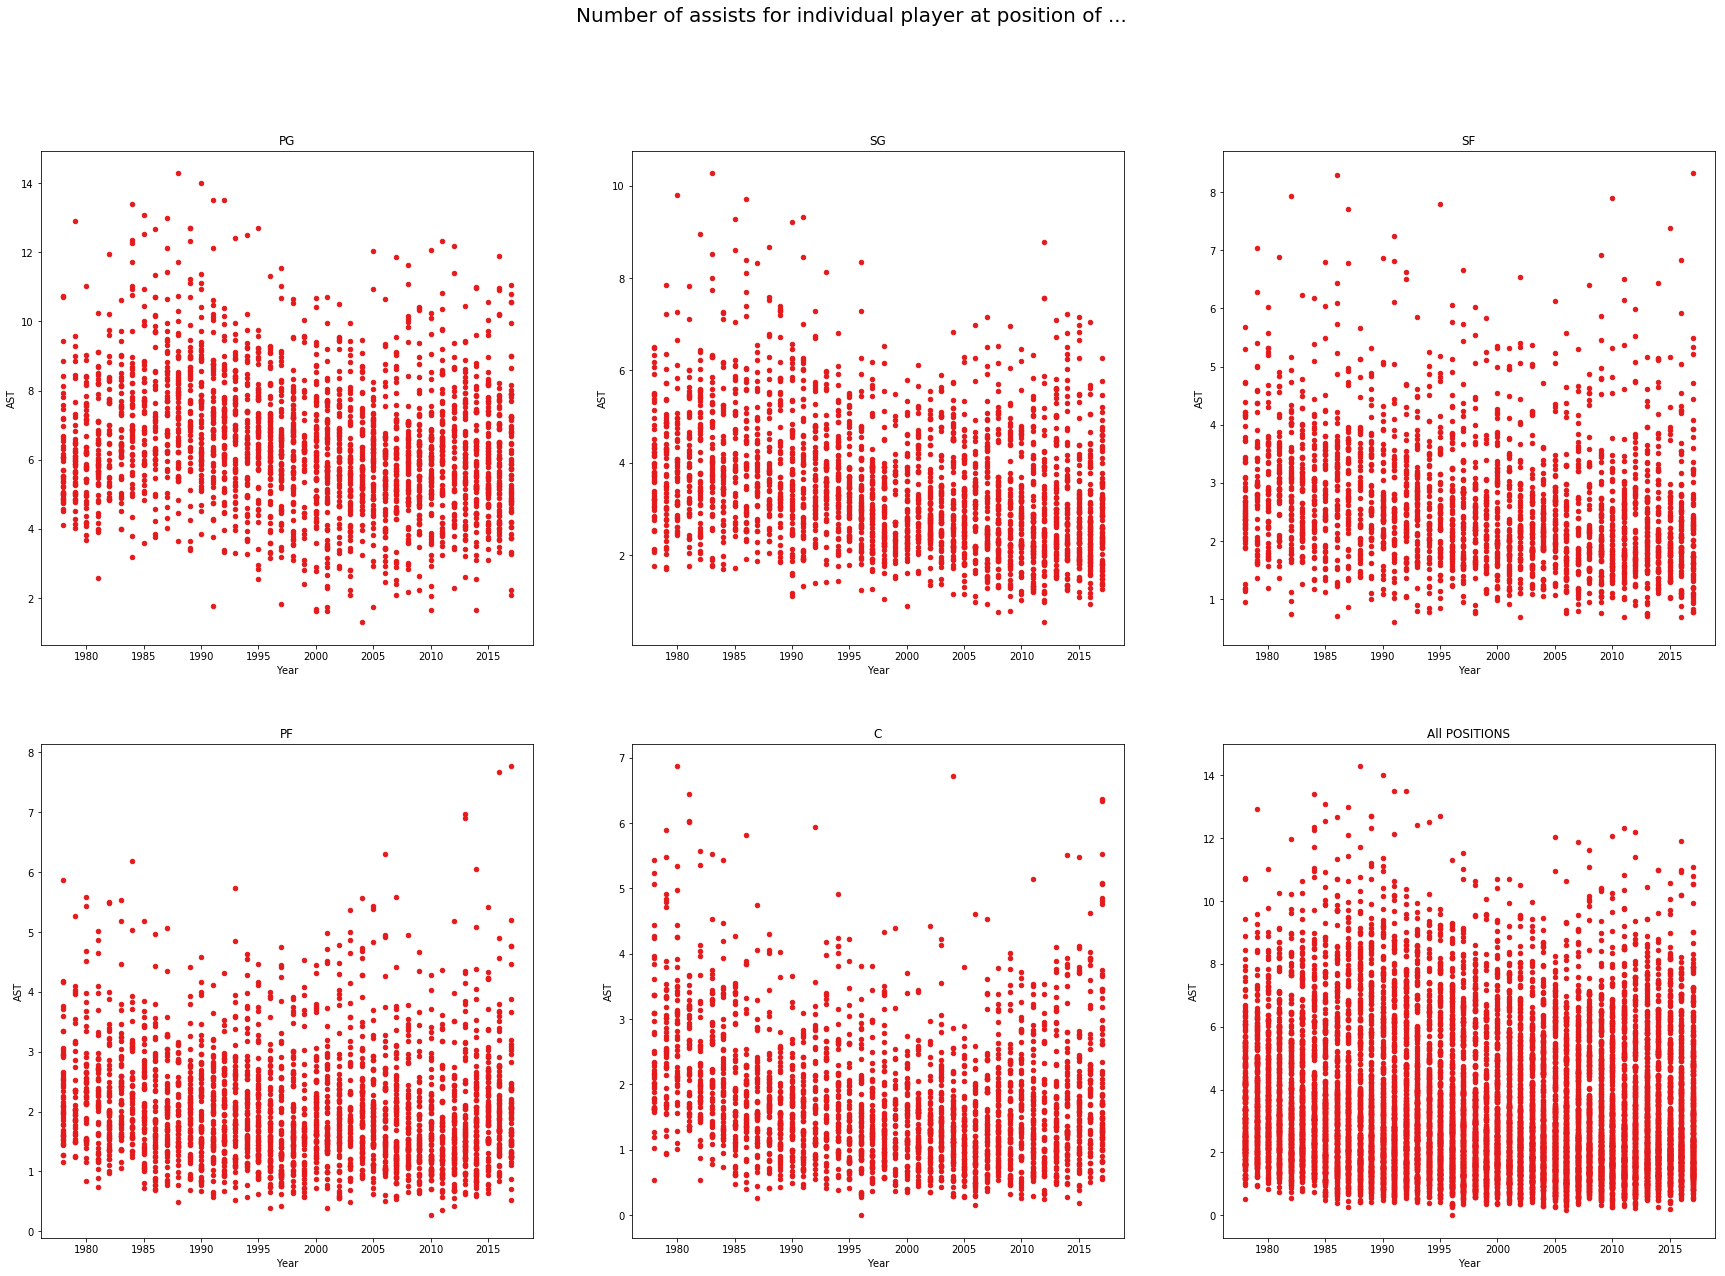

In [50]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Number of assists for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="AST",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="AST",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="AST",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="AST",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="AST",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="AST",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

####  Take the average number of assists per game of each players in different positions

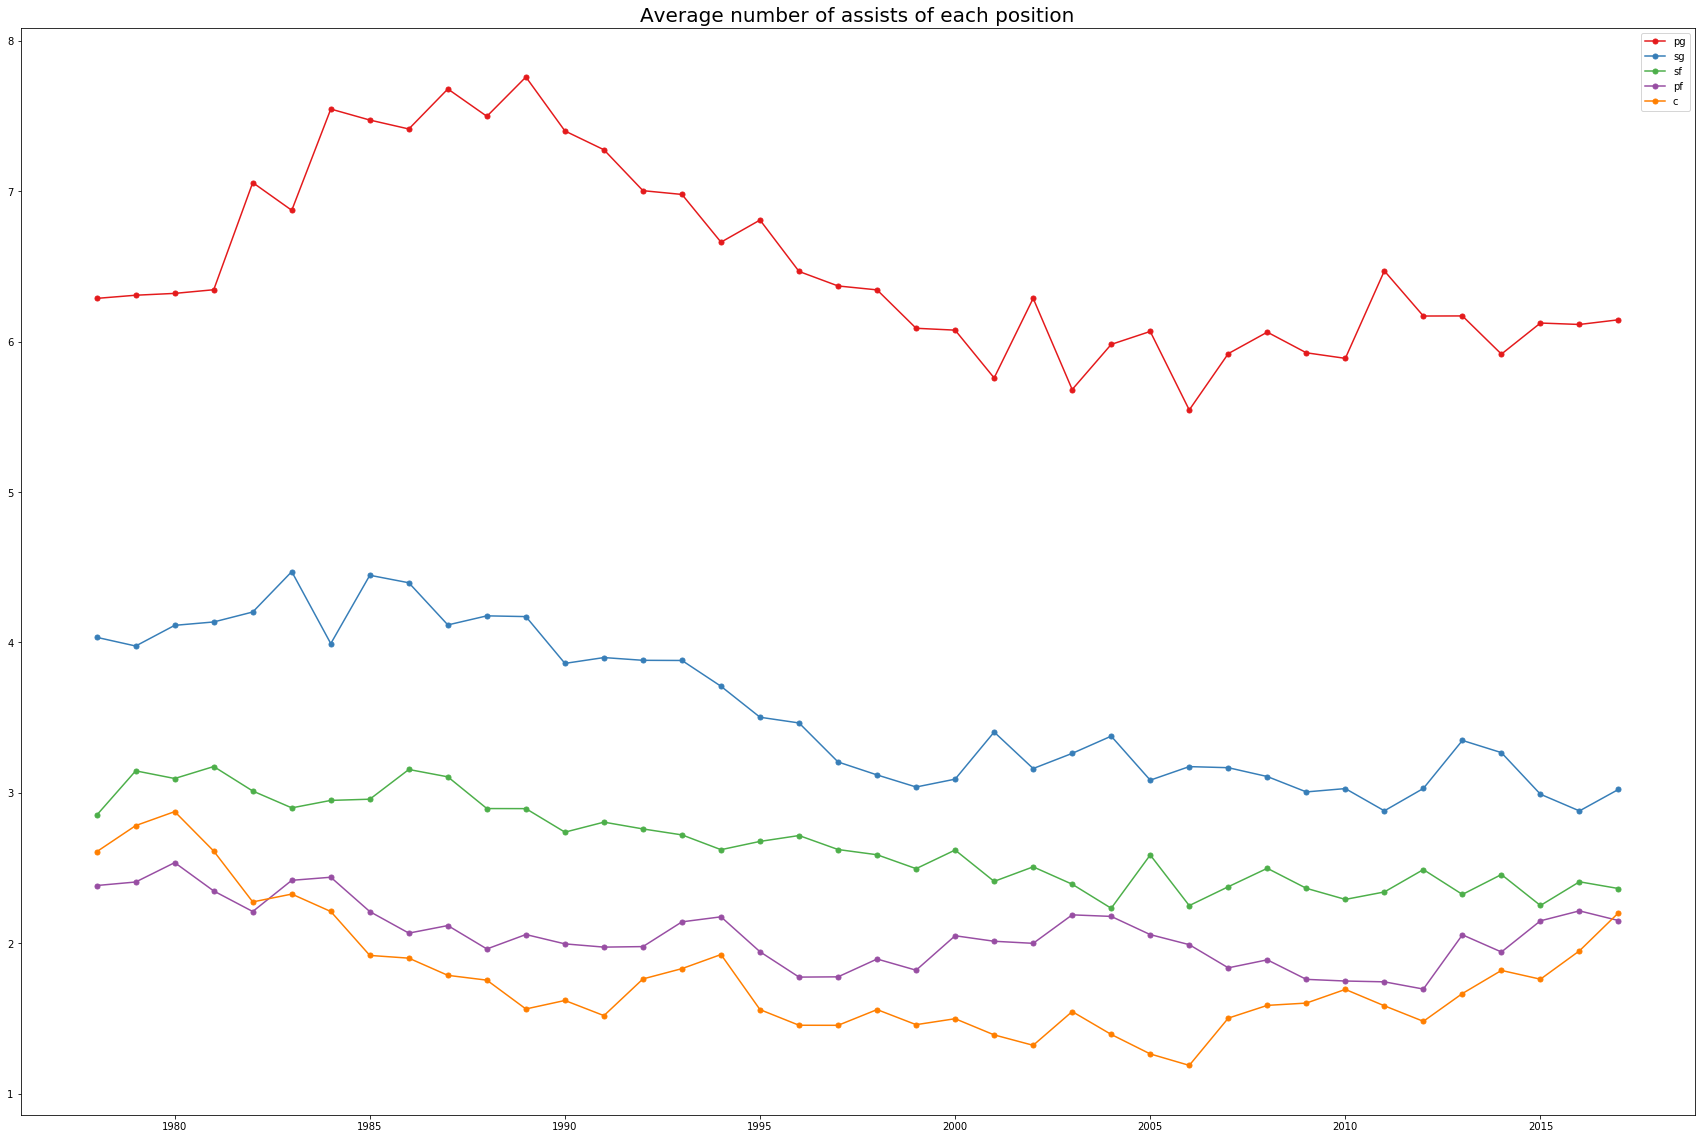

In [118]:
plt.figure(figsize=(30,20))
plt.title('Average number of assists of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='pg', linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='sg', linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='sf', linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='pf', linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['AST'],label='c', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

Across all positions, particularly in pg, the number decreases gradually until 2000, and remains same since then

#### Observe the number of assists for player distribution in each time period

Text(0.5, 1.0, '2011 to 2017')

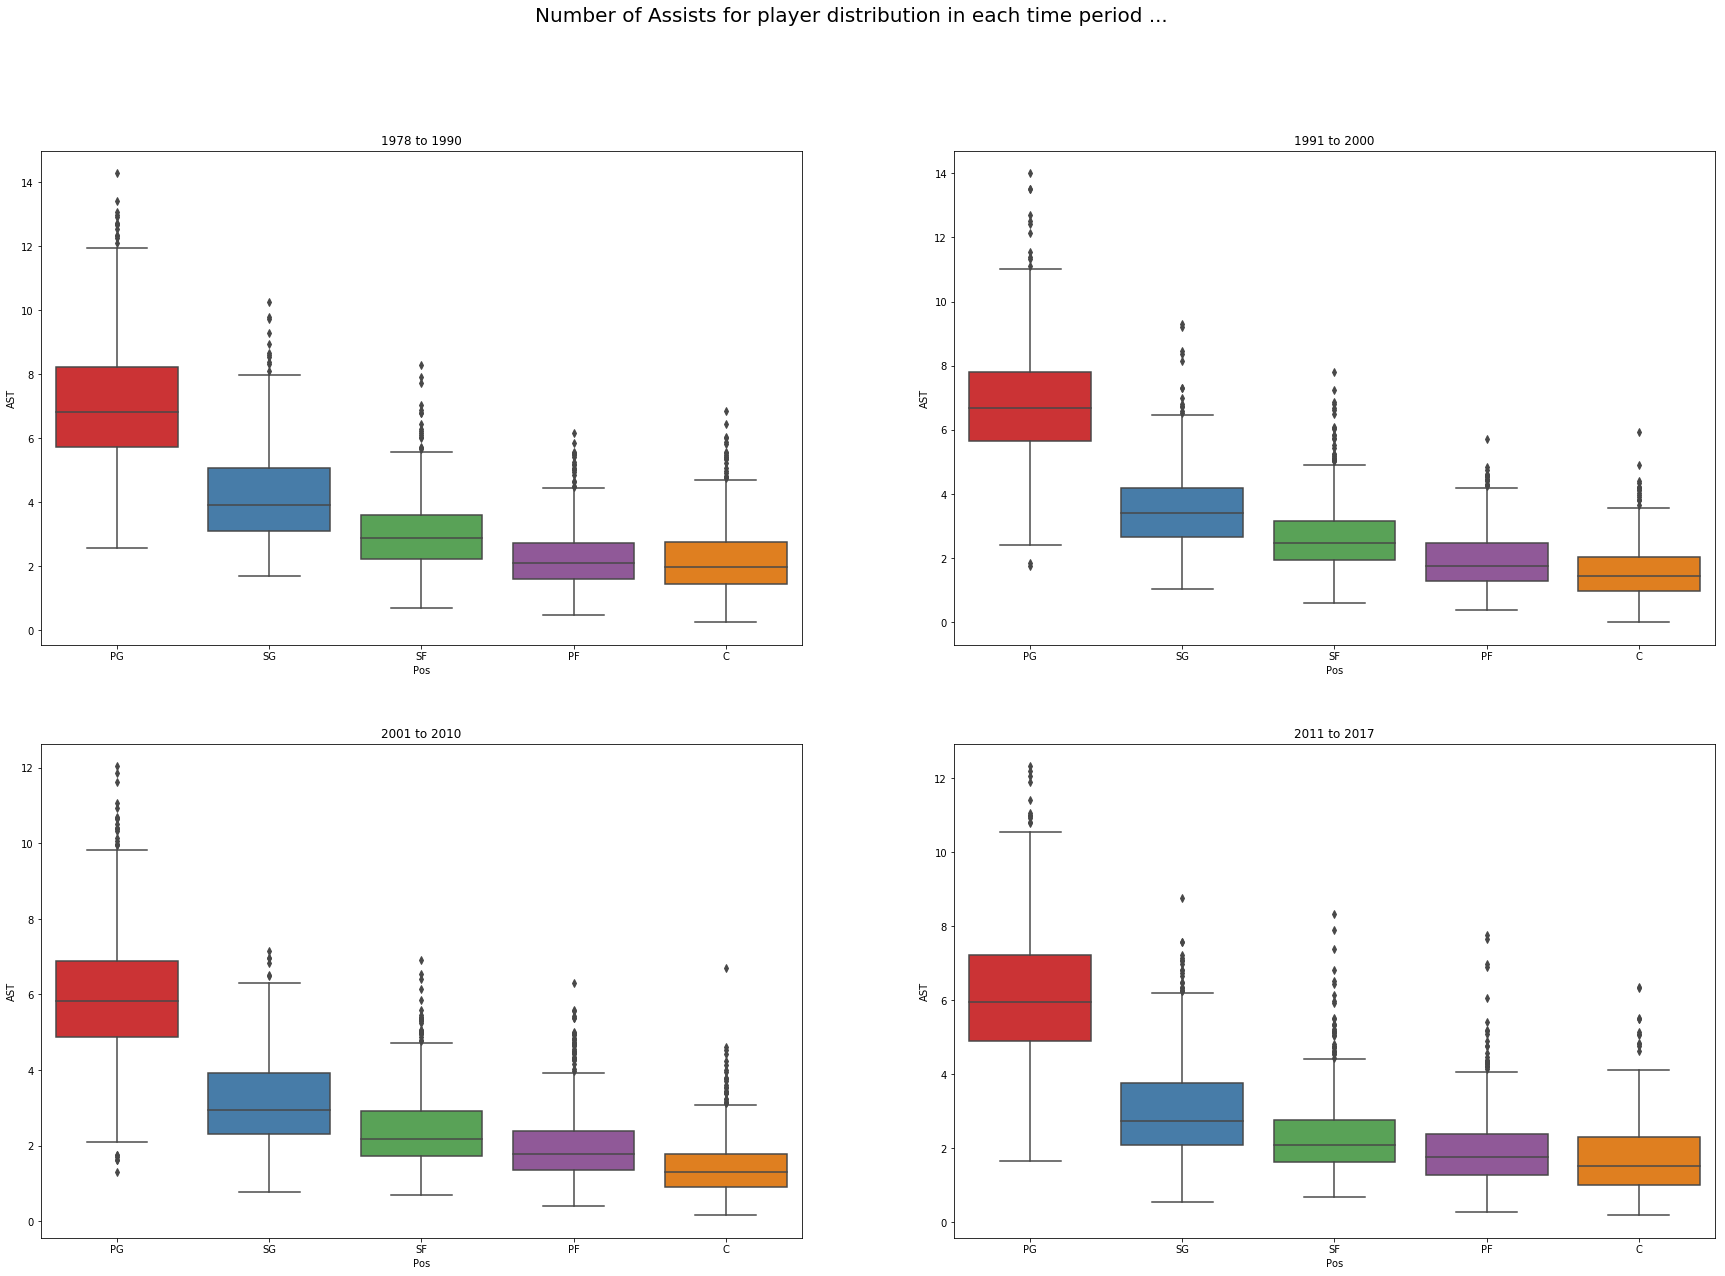

In [111]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Number of Assists for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="AST", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="AST", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="AST", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="AST", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

The box plot also shows the decreasing number of assists in PG as its 75% dropped from above 8 before 1990 to well below 8 after 2000s. 

## TRB (number of total rebound)

#### TRB (number of total rebound) of individual player in each position from 1978-2017

Text(0.5, 1.0, 'All POSITIONS')

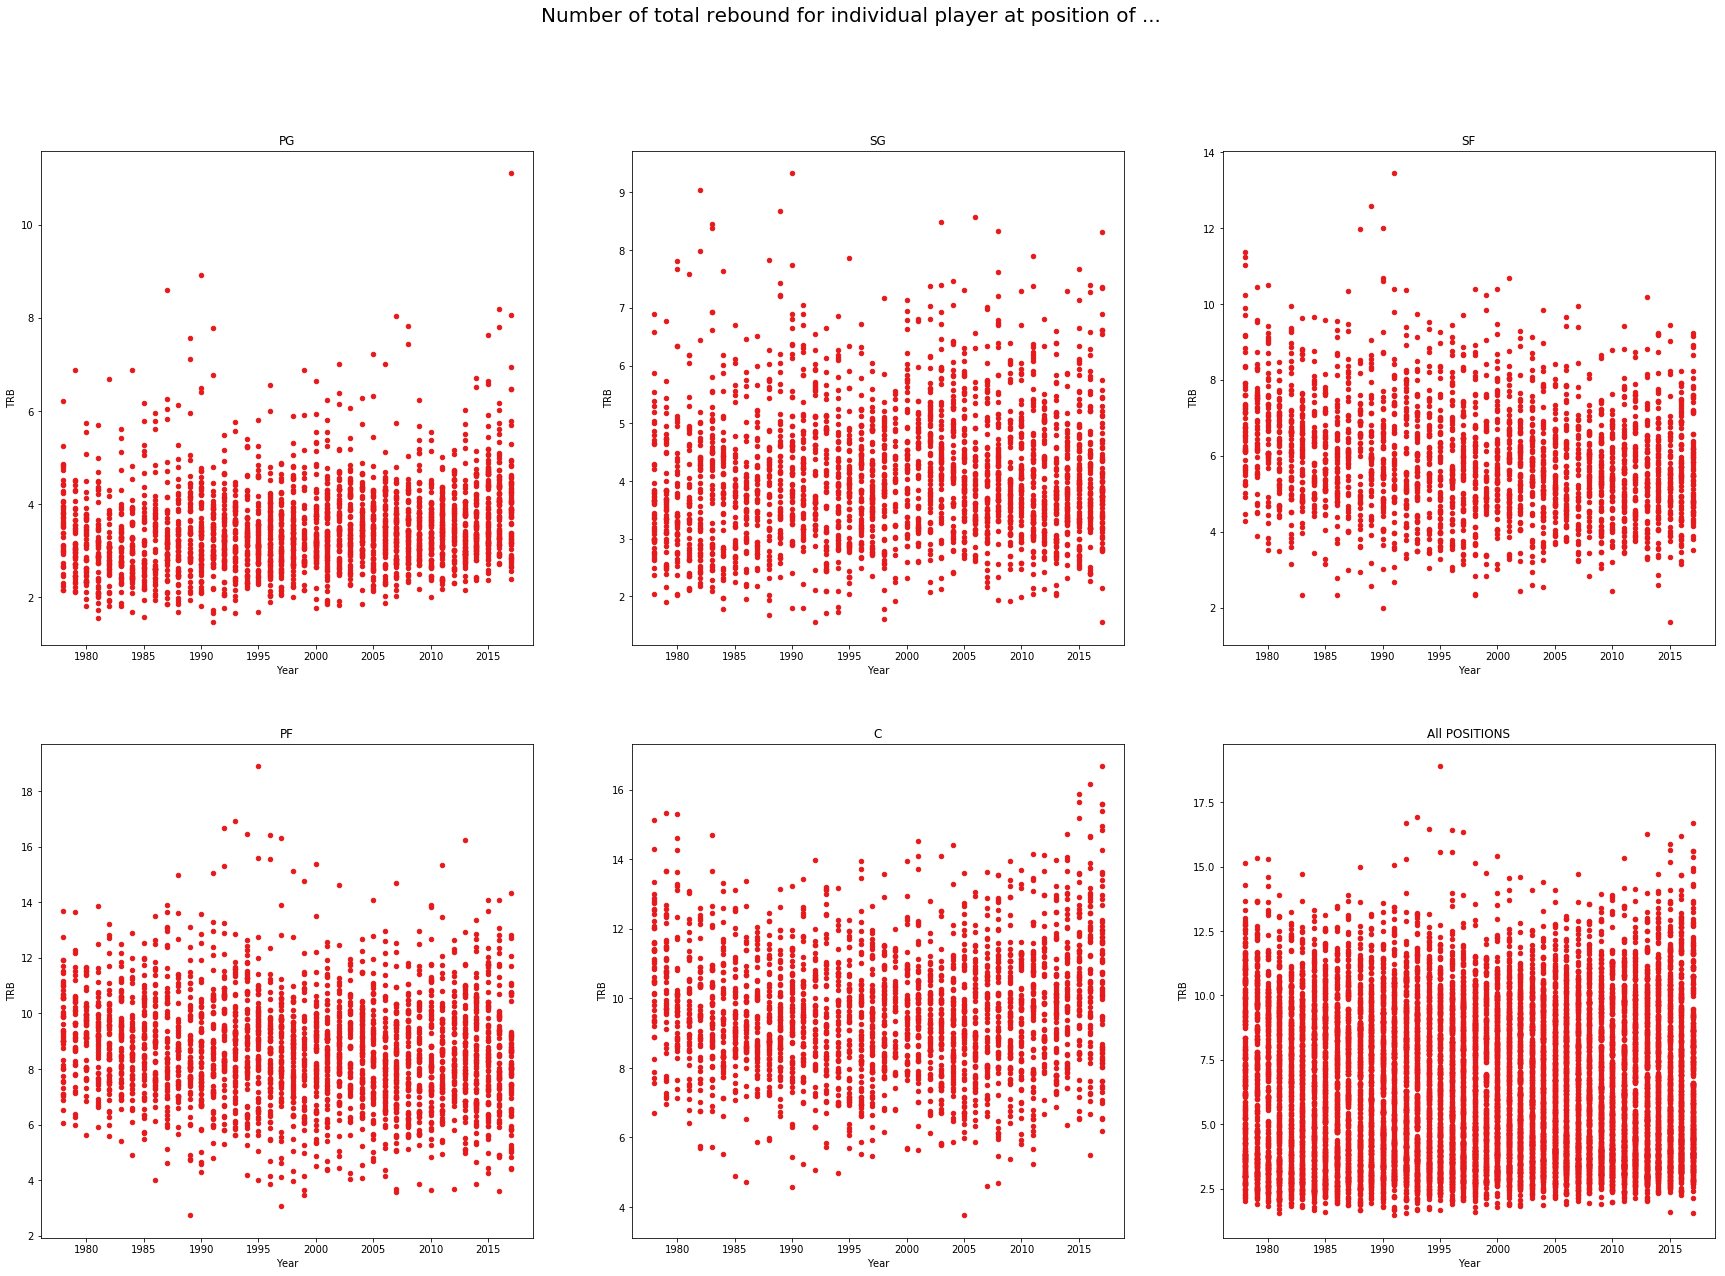

In [52]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Number of total rebound for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter',x='Year',y="TRB",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter',x='Year',y="TRB",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter',x='Year',y="TRB",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter',x='Year',y="TRB",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter',x='Year',y="TRB",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="TRB",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

A slight increase in number of rebounds in PG can be observed after 2010, beside that this number attributes stays around the same across most other positions.

####  Take the average number of total rebounds per game of each players in different positions

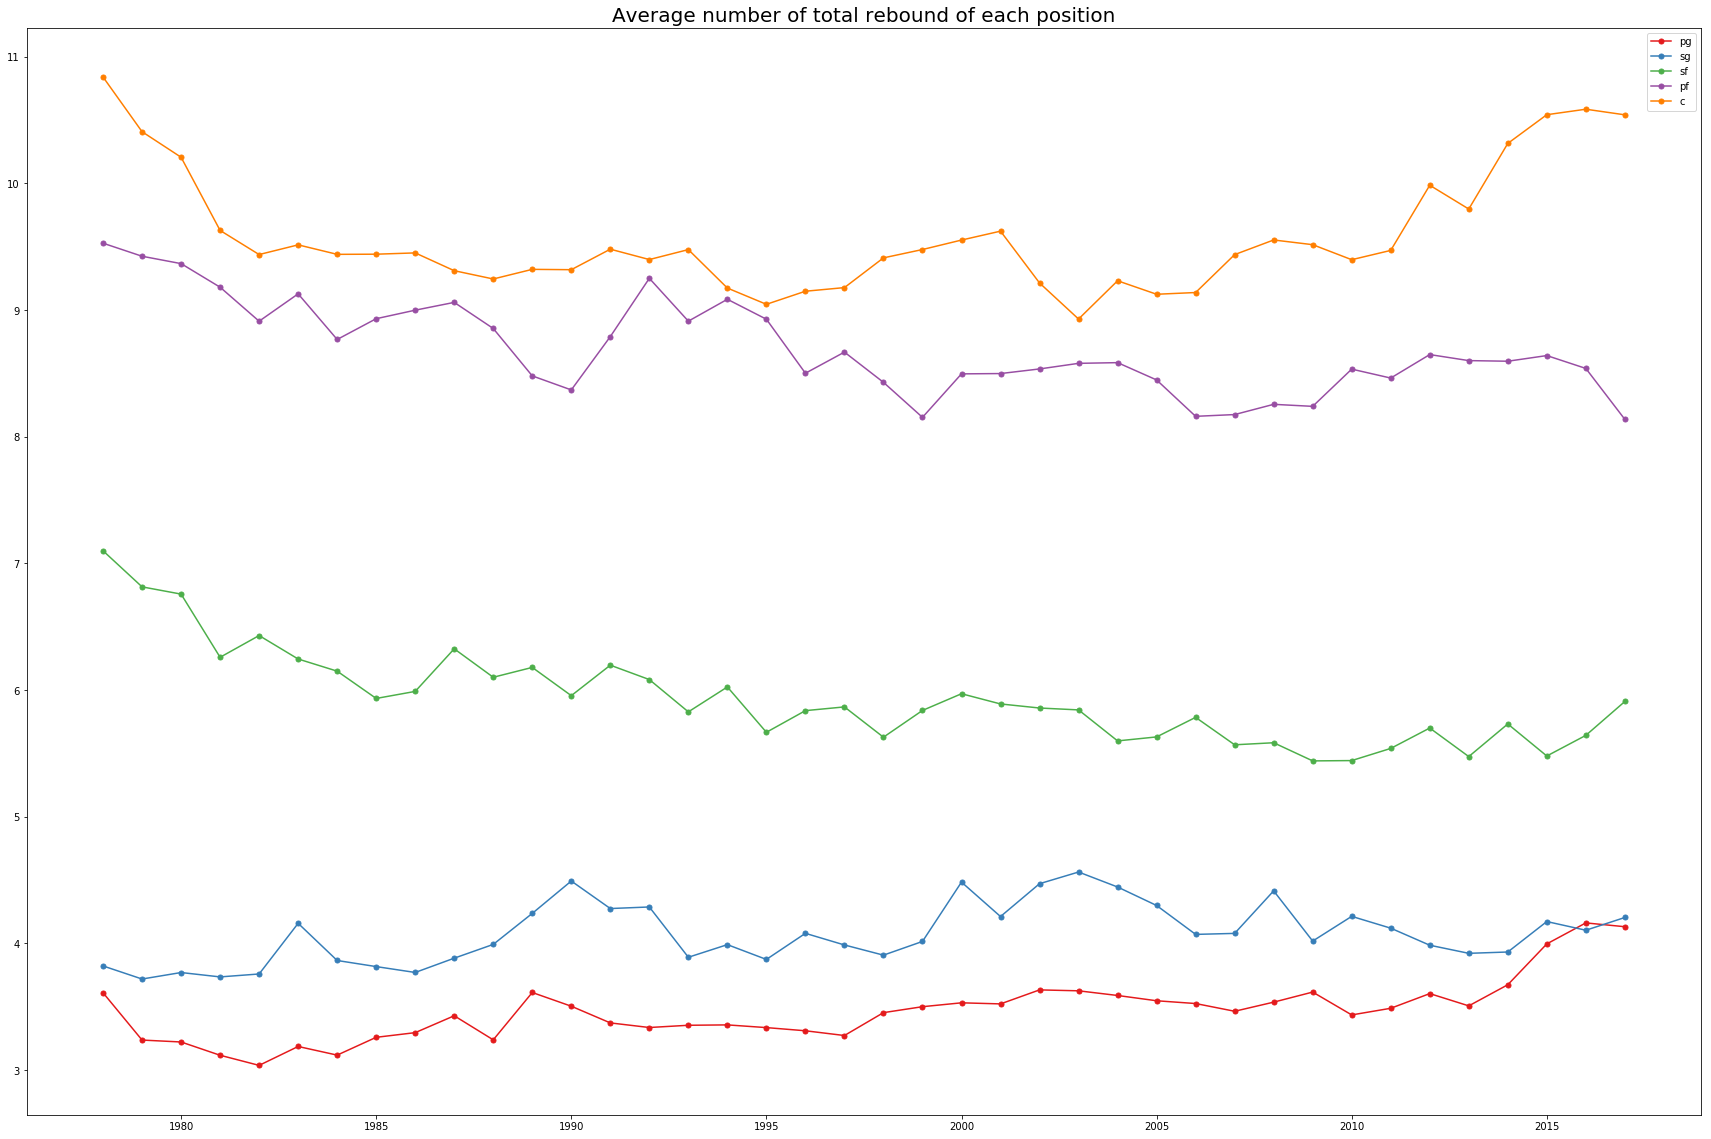

In [53]:
plt.figure(figsize=(30,20))
plt.title('Average number of total rebound of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='pg',linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='sg',linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='sf',linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='pf',linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['TRB'], label='c',linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

Number of total rebounds stays much the same across all positions throughout times.

#### Observe the number of total rebounds for player distribution in each time period

Text(0.5, 1.0, '2011 to 2017')

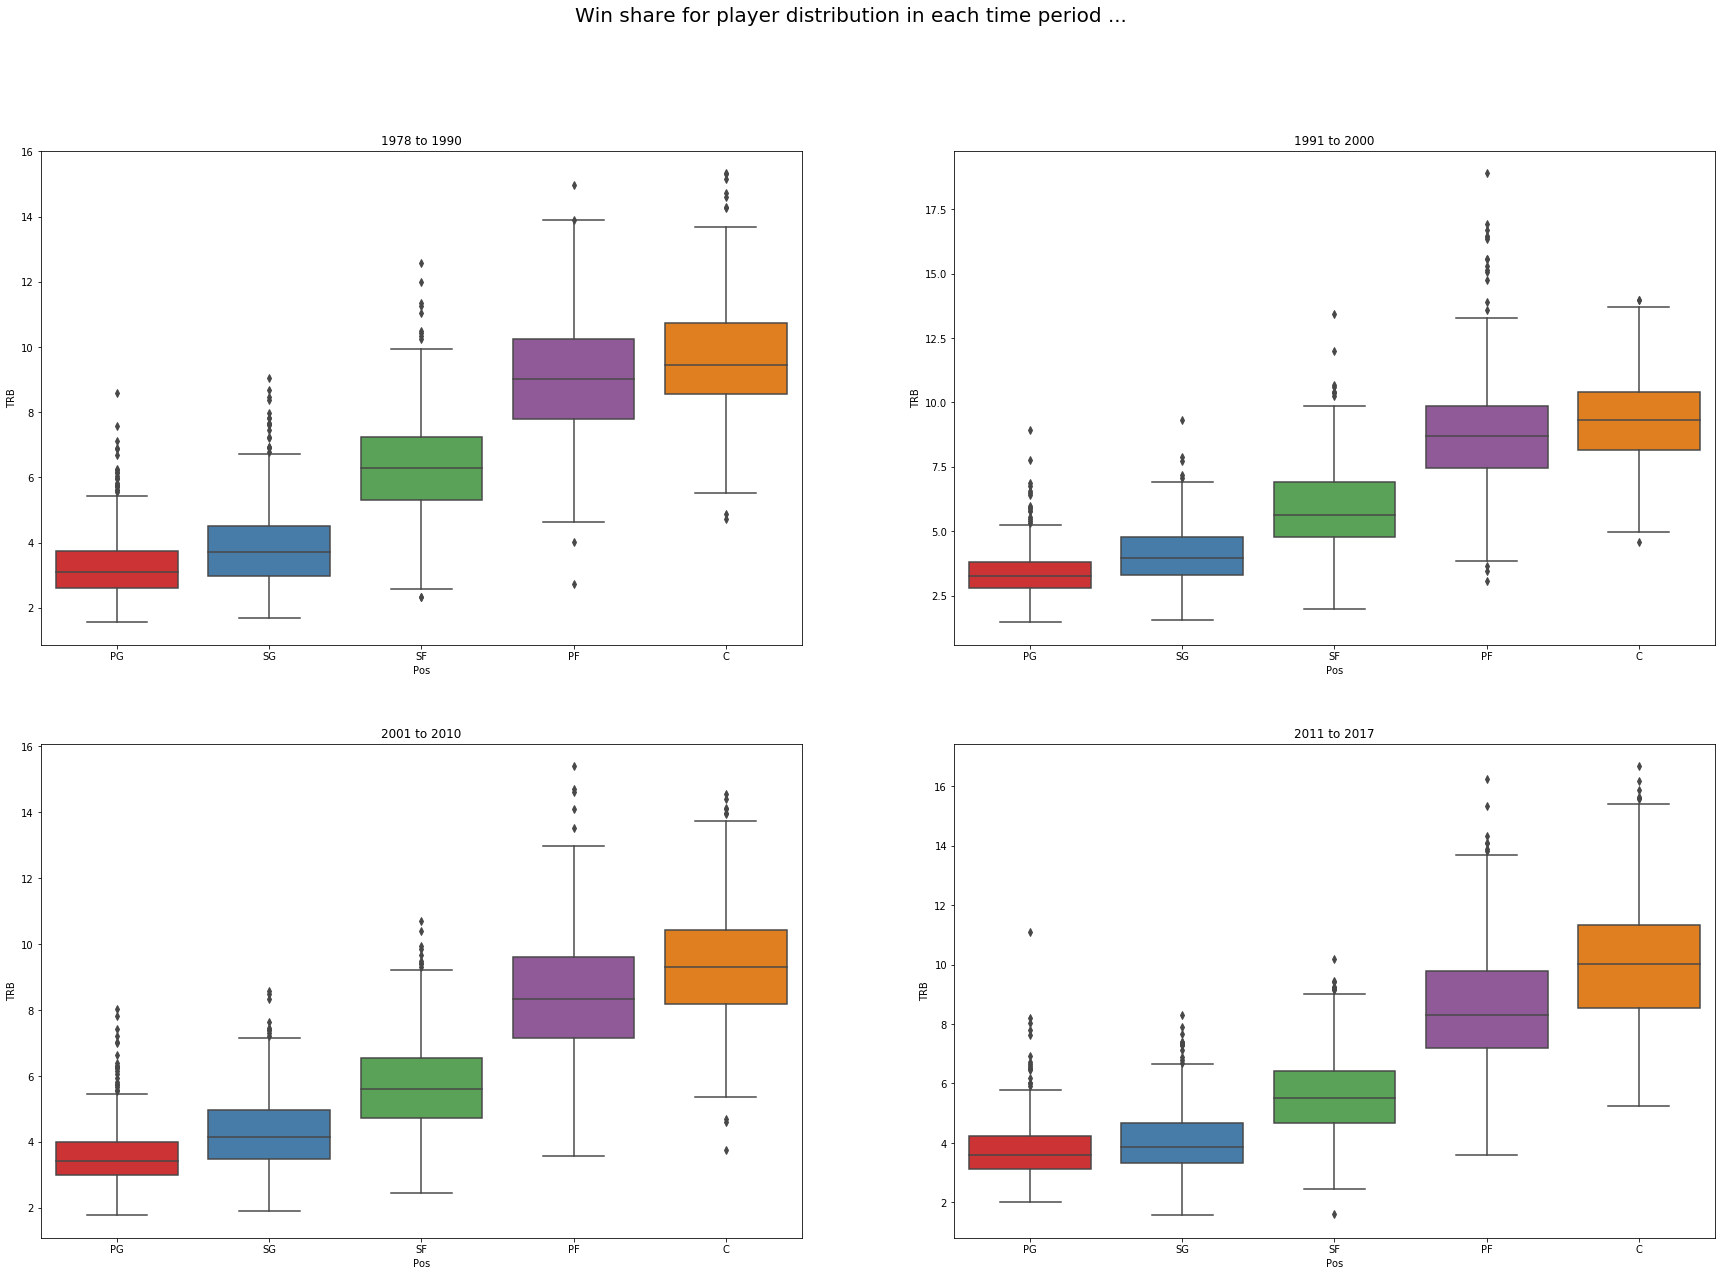

In [123]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Win share for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="TRB", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="TRB", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="TRB", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="TRB", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

The box plot also observes that number of total rebounds stays much the same across all positions throughout times, besides that, there's slight increase in number in PG and C.

## PF (number of personal fouls)

#### PF (number of personal fouls) of individual player in each position from 1978-2017

Text(0.5, 1.0, 'All POSITIONS')

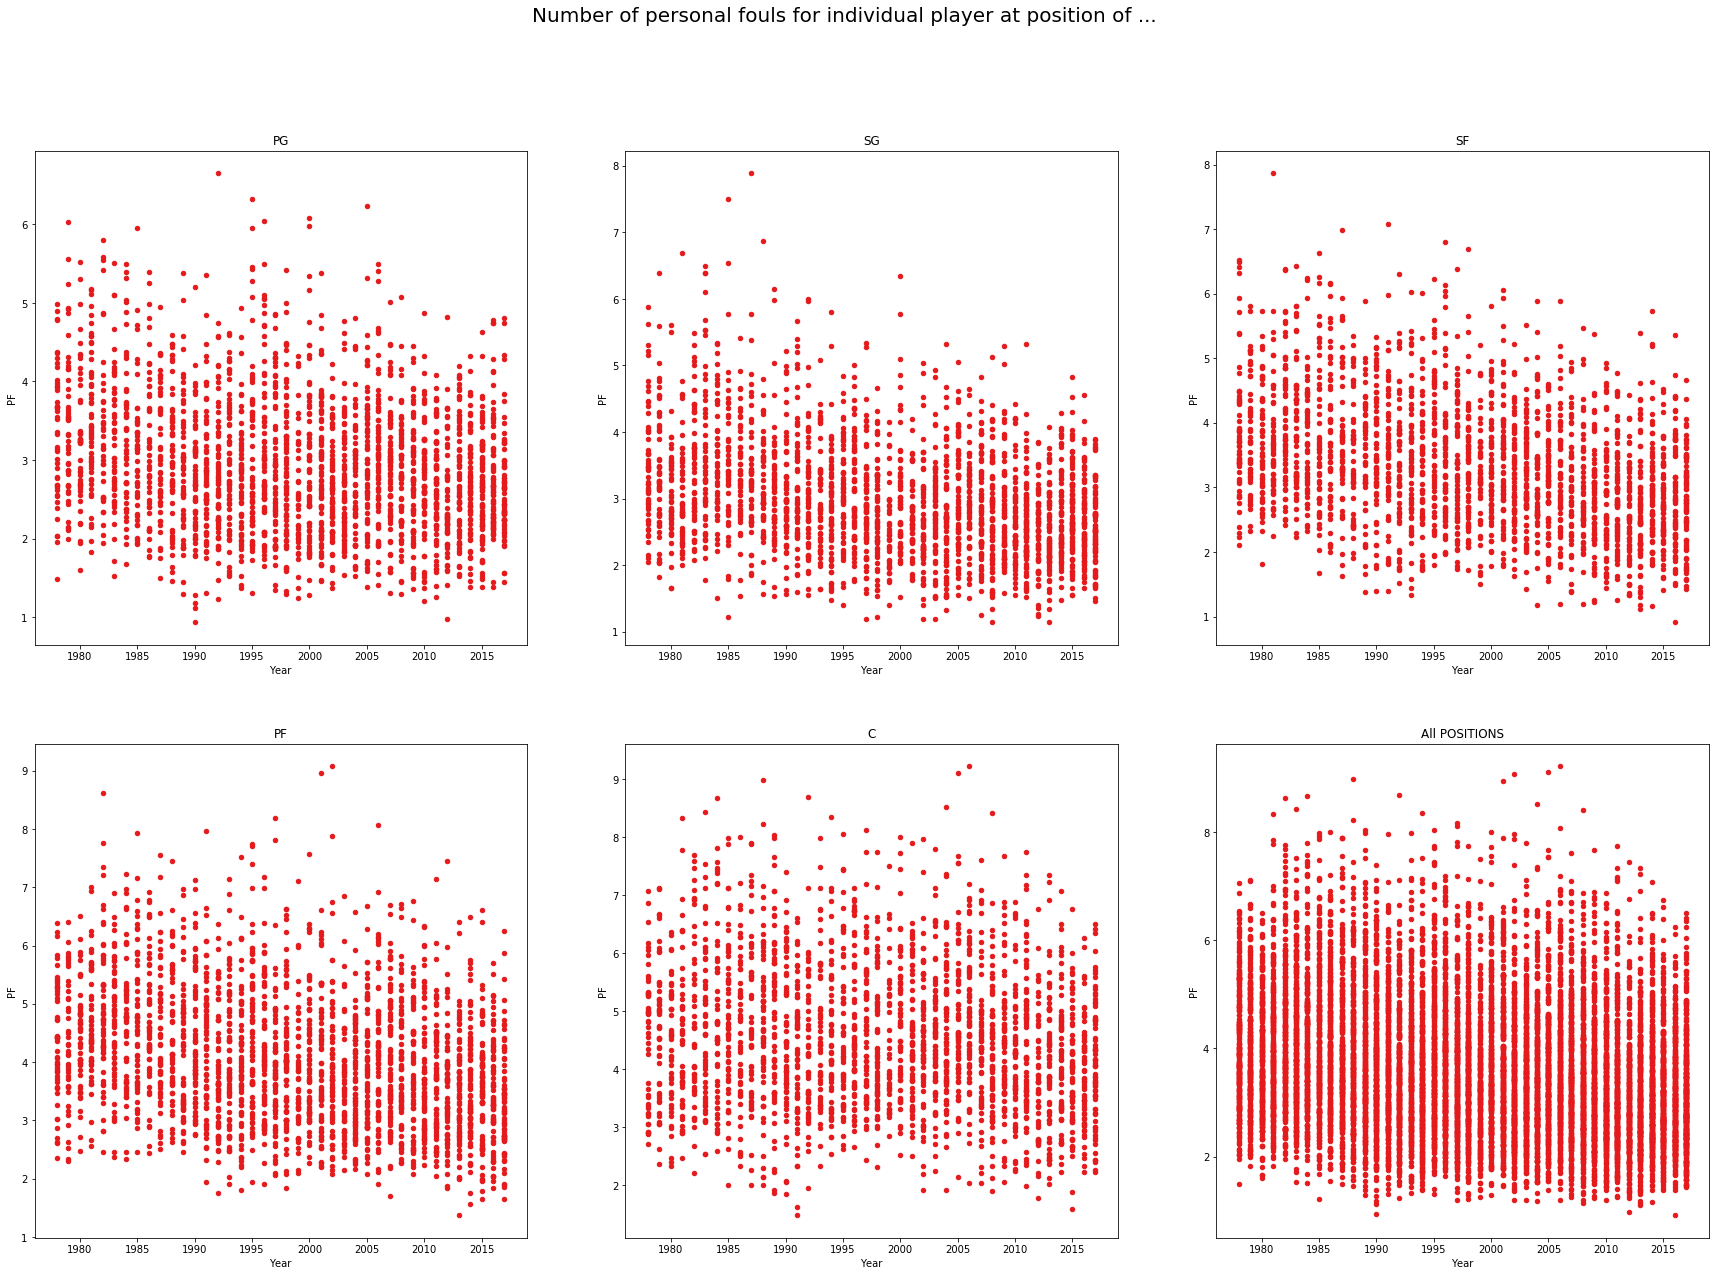

In [56]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle('Number of personal fouls for individual player at position of ...',fontsize=20)
pg.plot(kind='scatter', x='Year', y="PF",ax=axarr[0][0])
axarr[0, 0].set_title('PG')
sg.plot(kind='scatter', x='Year',y="PF",ax=axarr[0][1])
axarr[0, 1].set_title('SG')
sf.plot(kind='scatter', x='Year',y="PF",ax=axarr[0][2])
axarr[0, 2].set_title('SF')
pf.plot(kind='scatter', x='Year',y="PF",ax=axarr[1][0])
axarr[1, 0].set_title('PF')
c.plot(kind='scatter', x='Year',y="PF",ax=axarr[1][1])
axarr[1, 1].set_title('C')
data.plot(kind='scatter',x='Year',y="PF",ax=axarr[1][2])
axarr[1, 2].set_title('All POSITIONS')

####  Take the average number of personal fouls per game of each player in different positions

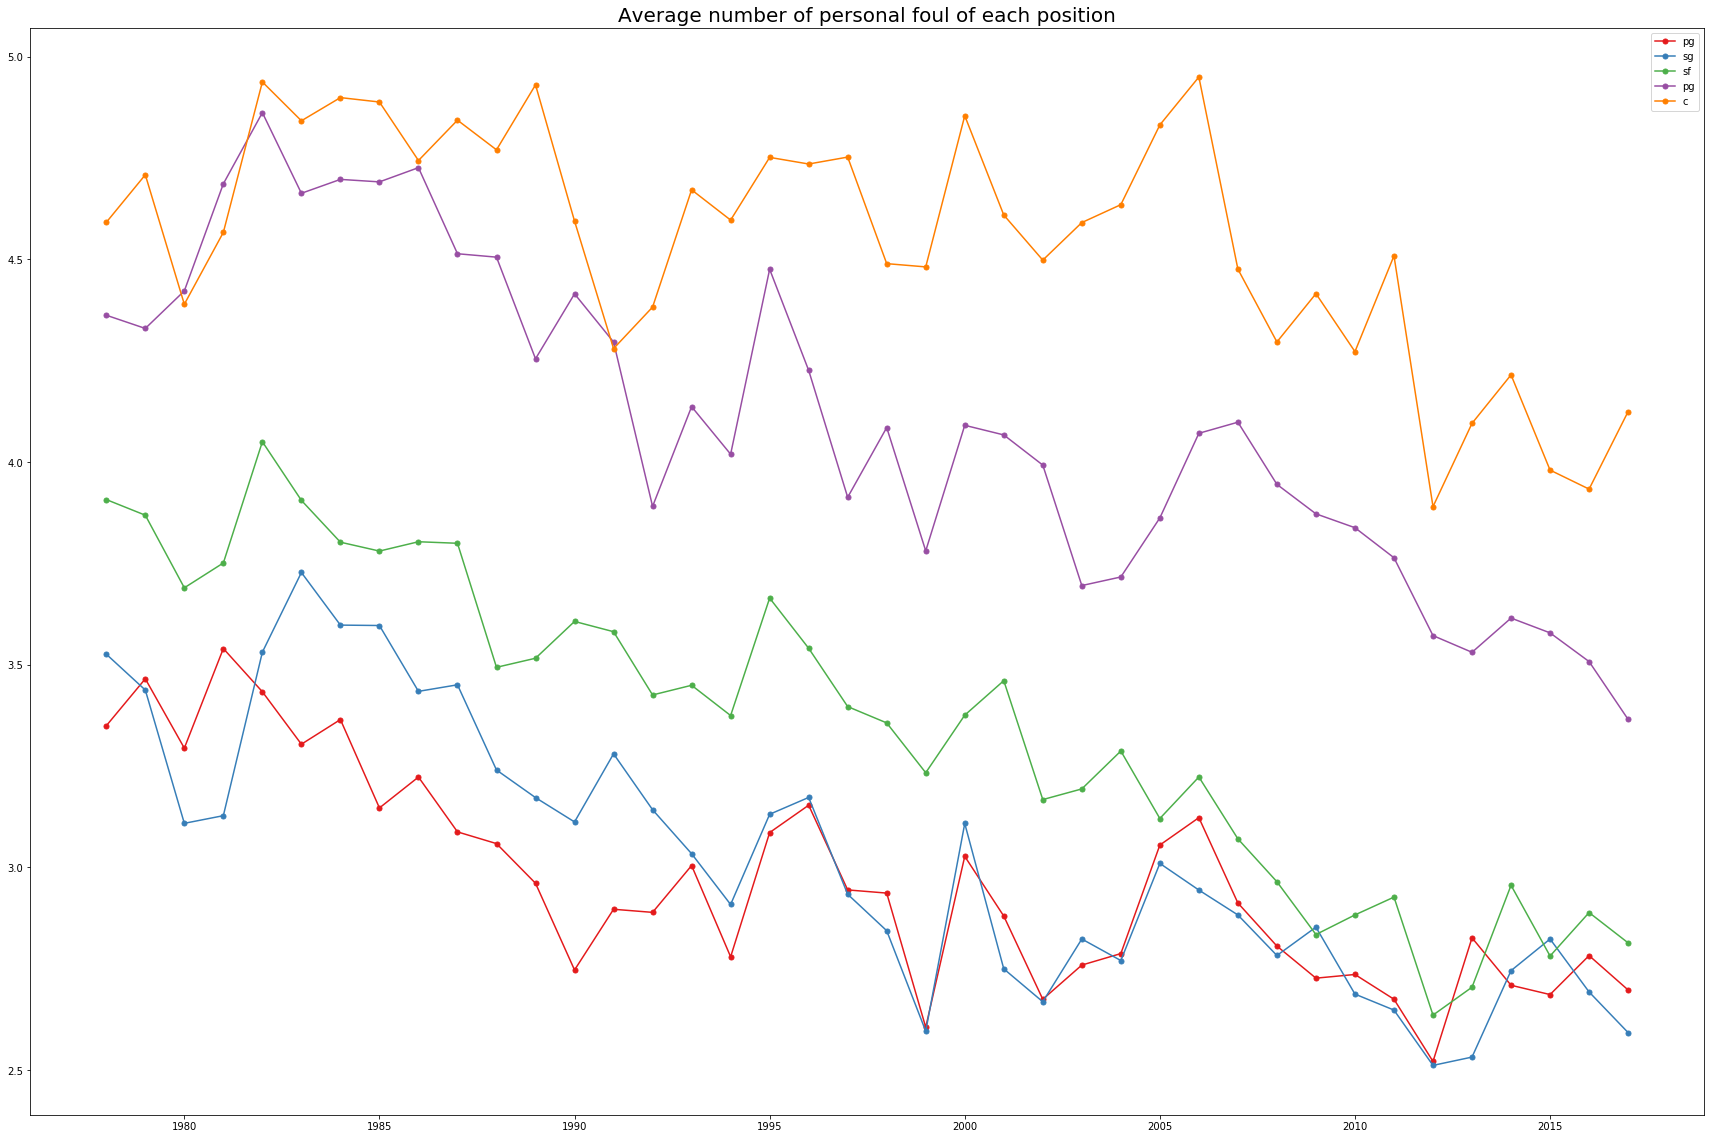

In [57]:
plt.figure(figsize=(30,20))
plt.title('Average number of personal foul of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='pg', linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='sg', linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='sf', linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='pg', linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['PF'], label='c', linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

Number of personal fouls decreass gradually across all positions, but C still leads by a wider margin in number of personal fouls in 5 positions. 

## FT(number of free throws)

#### Take the average number of free throws of each player in different positions.

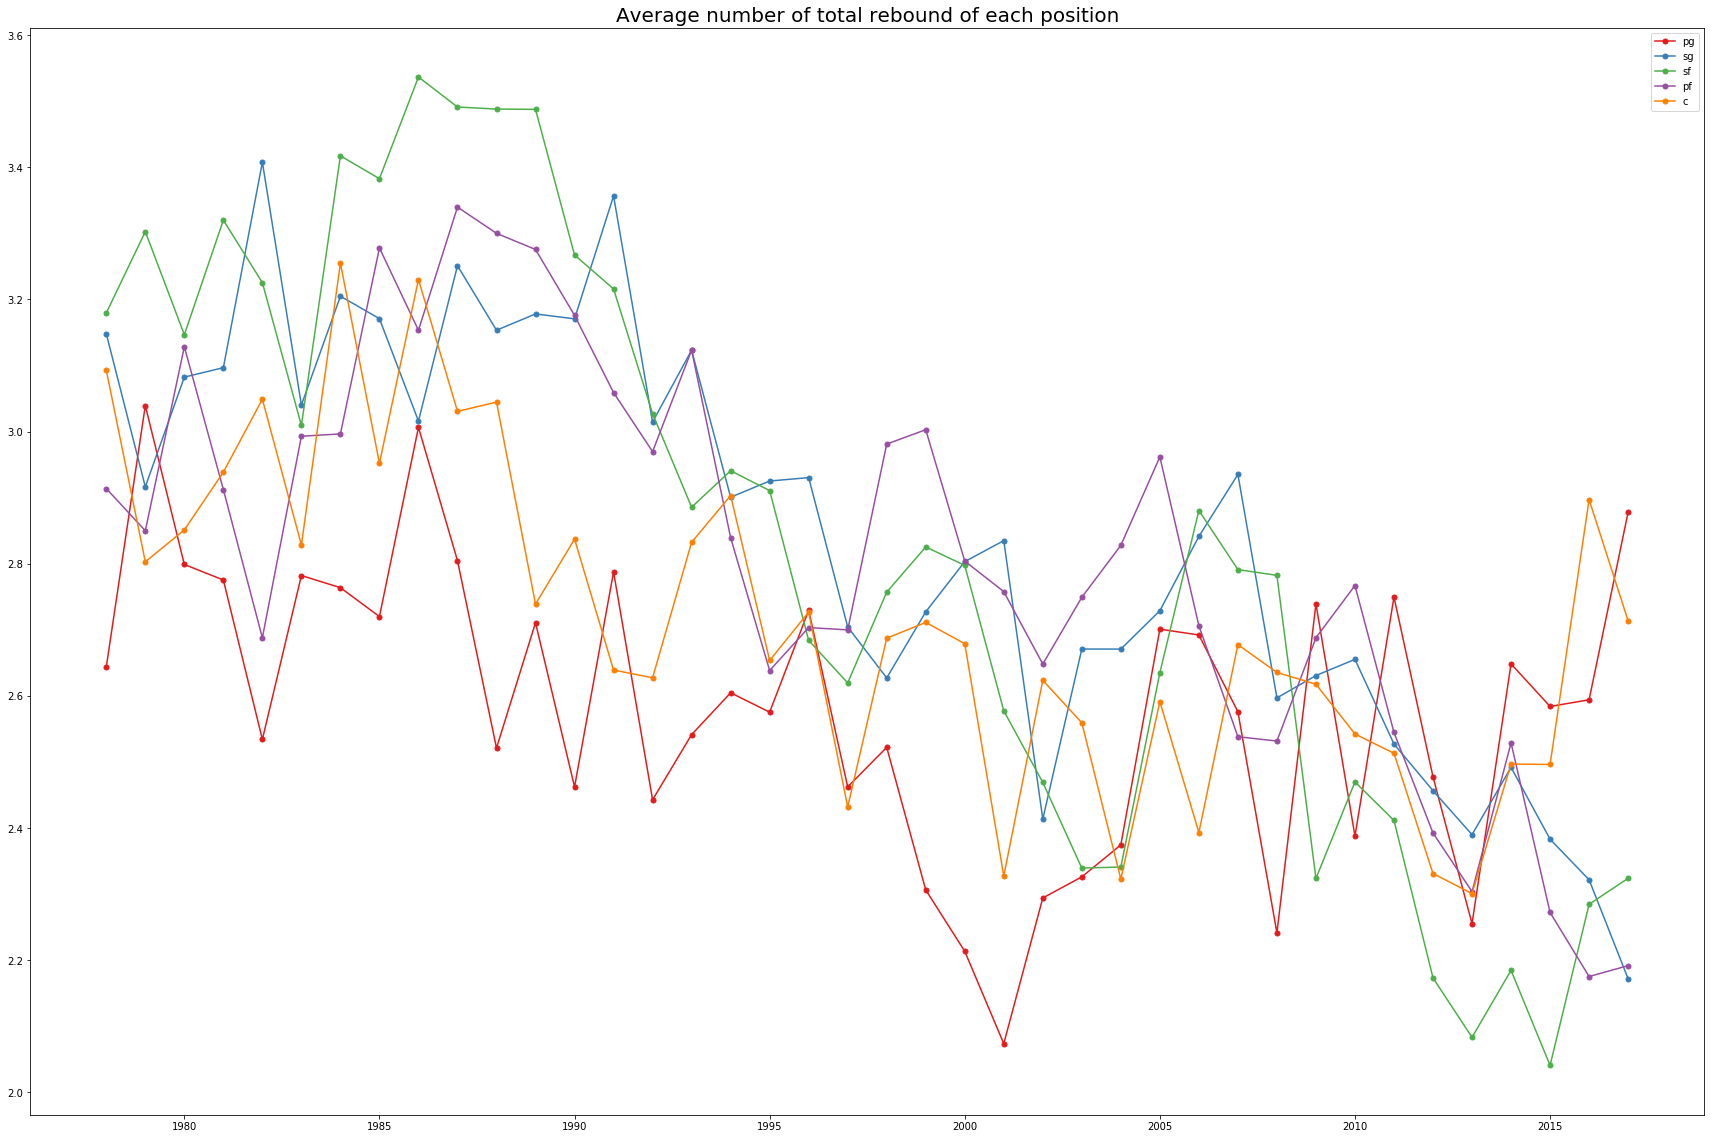

In [130]:
plt.figure(figsize=(30,20))
plt.title('Average number of free throws of each position',fontsize=20)
bench_by_size = pg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['FT'], label='pg',linestyle='-', marker='o', markersize=5)

bench_by_size = sg.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['FT'], label='sg',linestyle='-', marker='o', markersize=5)

bench_by_size = sf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['FT'], label='sf',linestyle='-', marker='o', markersize=5)

bench_by_size = pf.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['FT'], label='pf',linestyle='-', marker='o', markersize=5)

bench_by_size = c.groupby('Year')
means = bench_by_size.mean()
plt.plot(means['FT'], label='c',linestyle='-', marker='o', markersize=5)
plt.legend(loc='upper right')
plt.show()

The number of free throws has been decreasing across all positions over the time.

#### Observe the number of free throws for player distribution in each time period

Text(0.5, 1.0, '2011 to 2017')

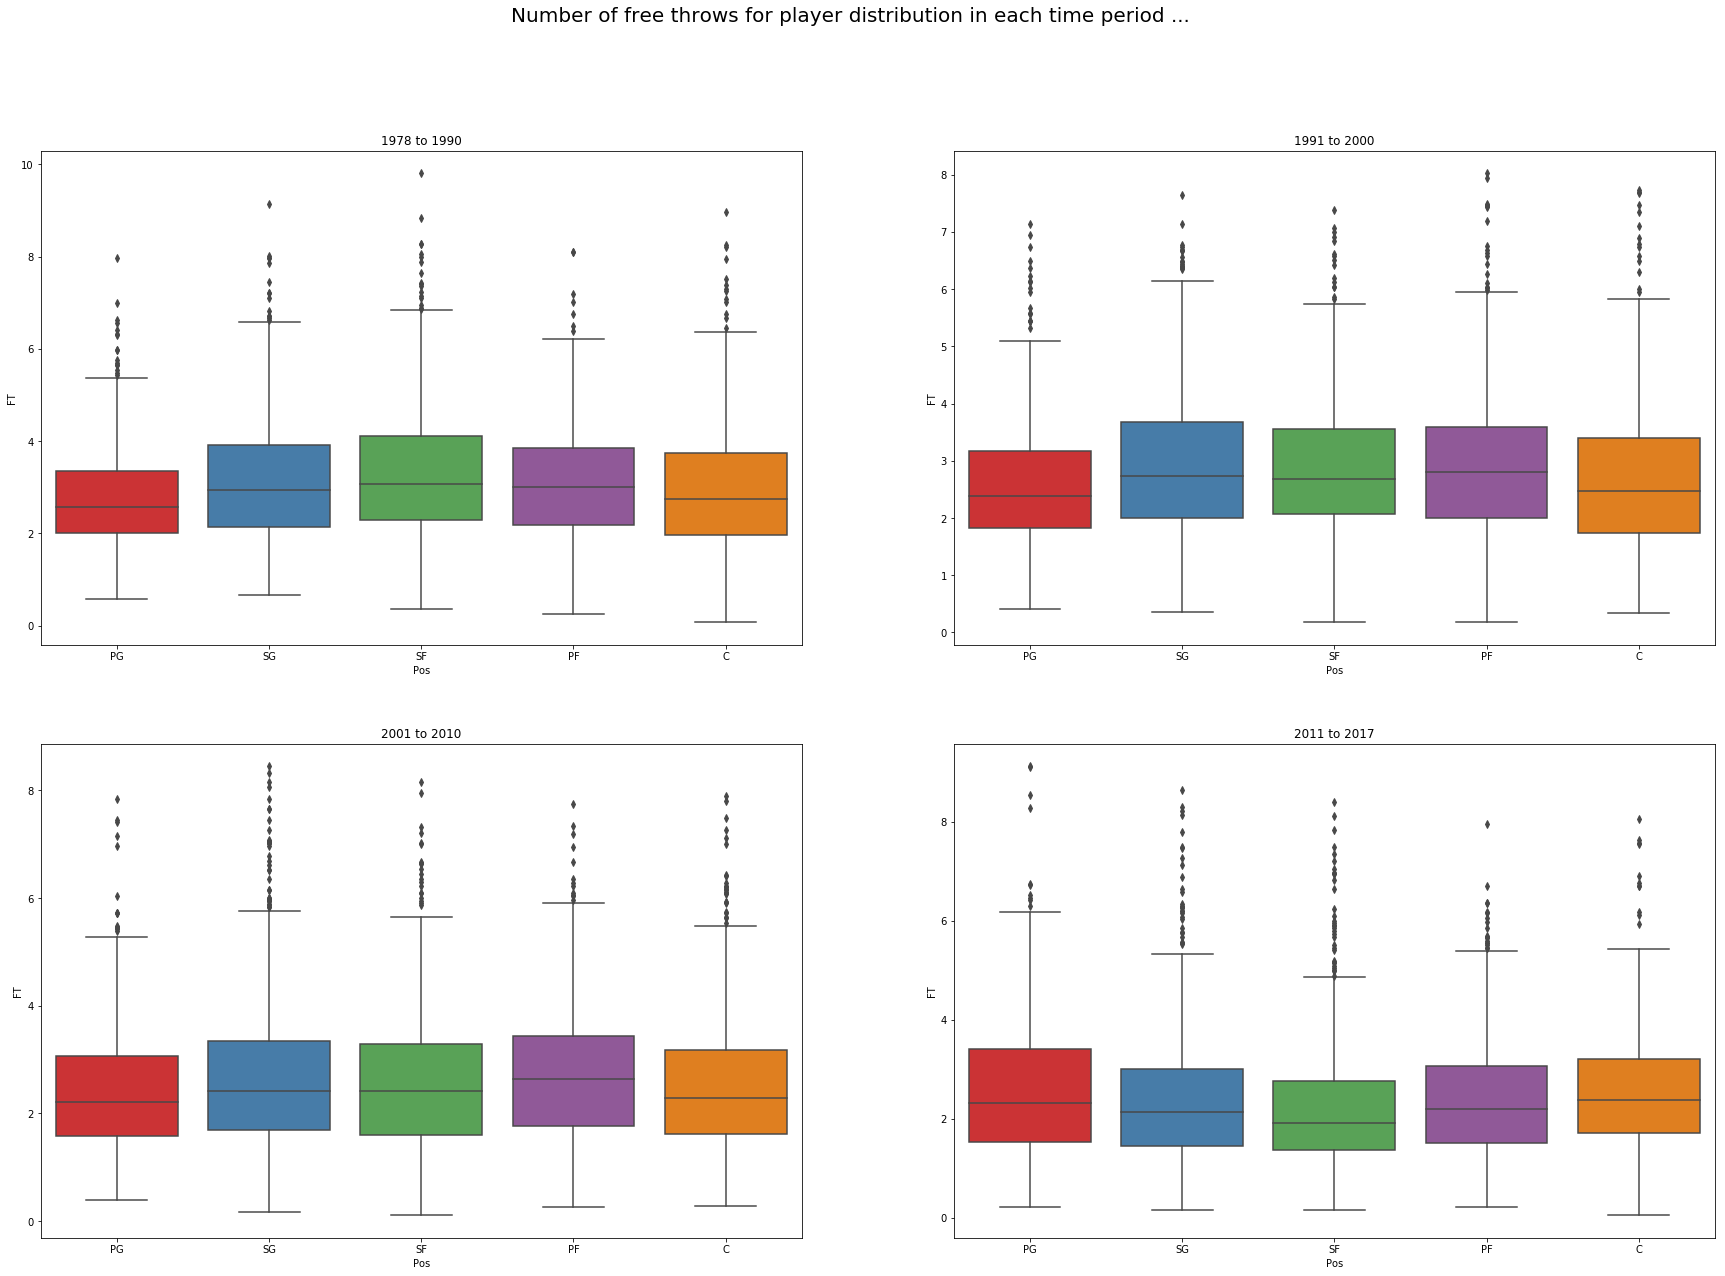

In [62]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Number of free throws for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="FT", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="FT", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="FT", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="FT", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

The number of free throws, once was dominated by SF in all positions, has been shifted to C and PG throughout times.

## BLK(Number of blocks)


#### Observe the number of blocks for player distribution in each time period

Text(0.5, 1.0, '2011 to 2017')

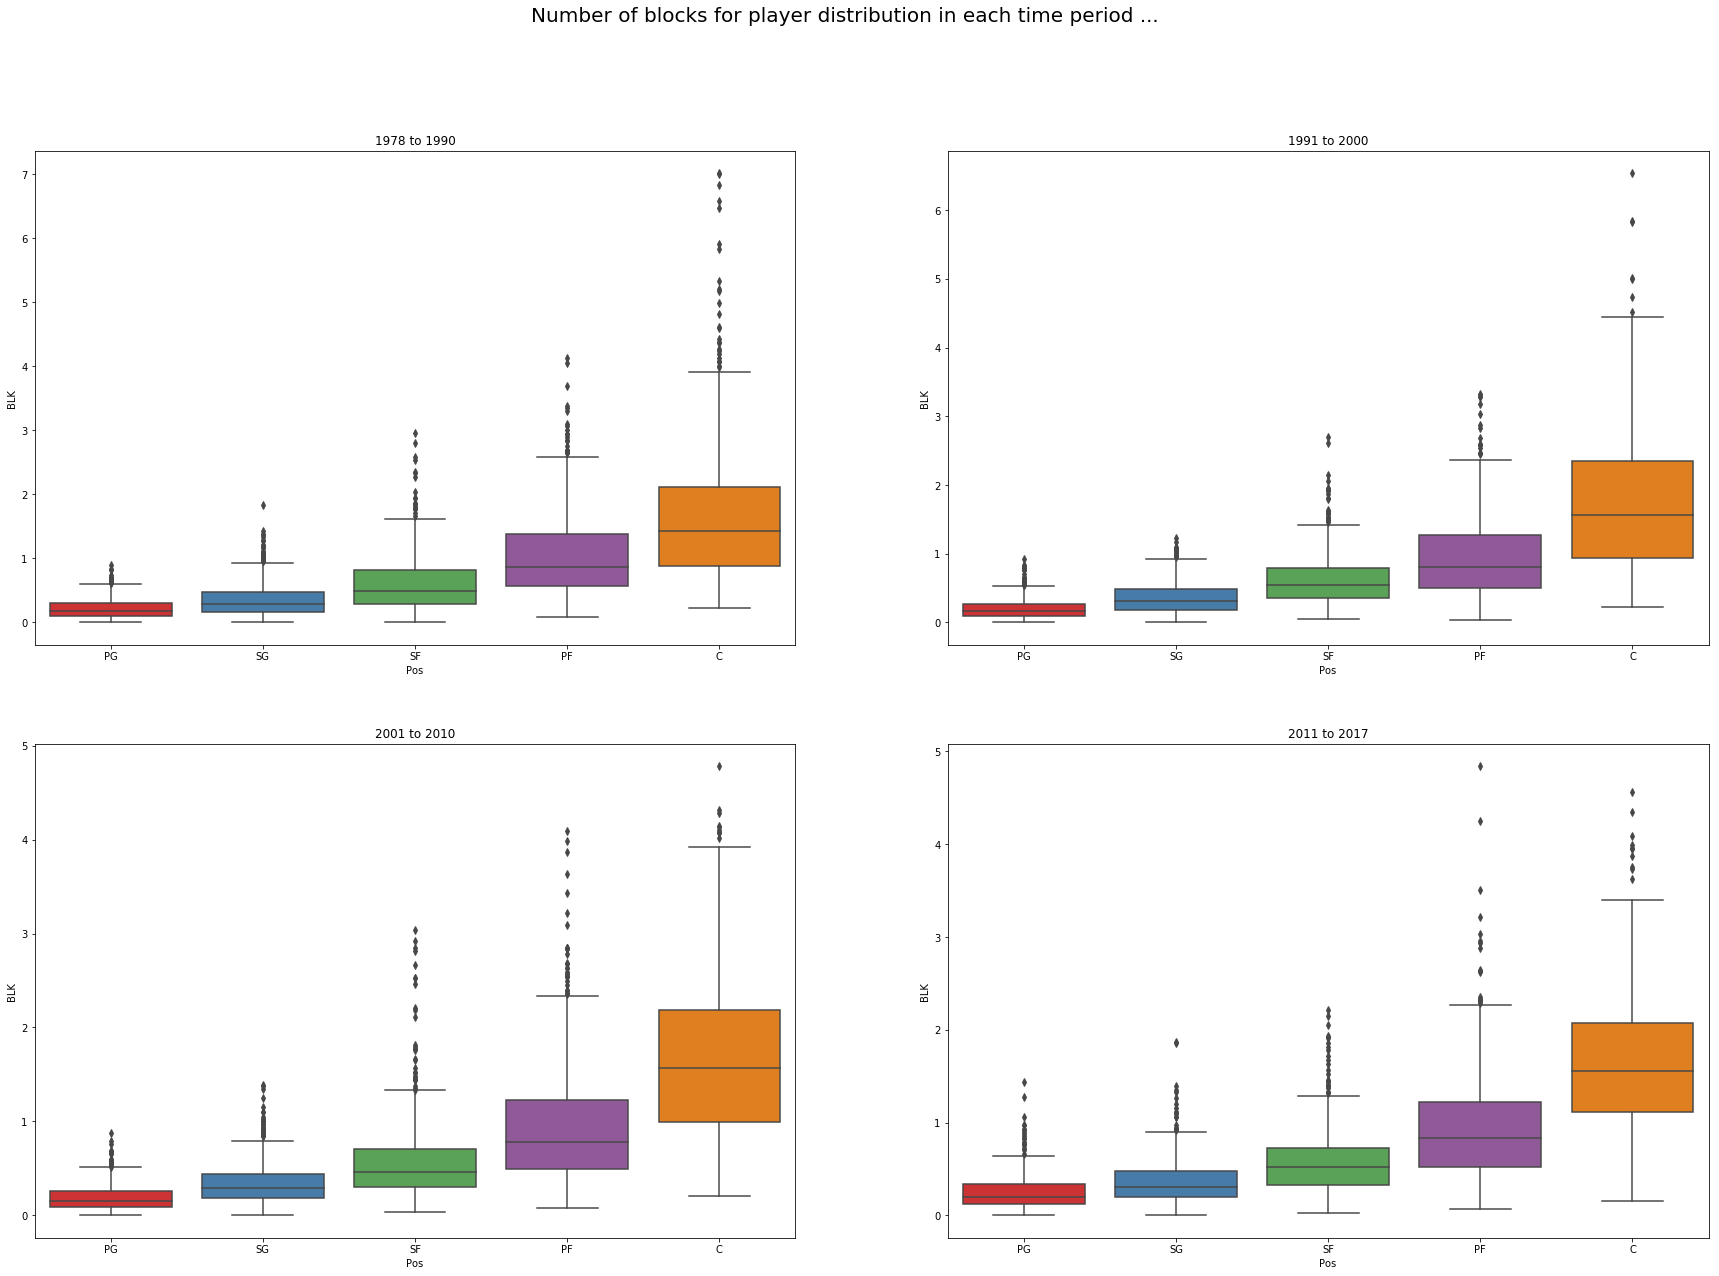

In [131]:
fig, axarr = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Number of blocks for player distribution in each time period ...',fontsize=20)
sns.boxplot(x="Pos", y="BLK", data=pre90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][0])
axarr[0, 0].set_title('1978 to 1990')
sns.boxplot(x="Pos", y="BLK", data=_90s,order=["PG", "SG", "SF","PF","C"],ax=axarr[0][1])
axarr[0, 1].set_title('1991 to 2000')
sns.boxplot(x="Pos", y="BLK", data=_00s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][0])
axarr[1, 0].set_title('2001 to 2010')
sns.boxplot(x="Pos", y="BLK", data=_10s,order=["PG", "SG", "SF","PF","C"],ax=axarr[1][1])
axarr[1, 1].set_title('2011 to 2017')

The box plot suggests C has become more dominant in leading the number of blocks in recent decades.